##### In american football, to predict the passing yards for  quarterback, trying with adding previous year data

In [166]:
import pandas as pd
import numpy as np

from matplotlib import pyplot
import seaborn

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [167]:
file_path_2024 = r"../../../data/nba/nba_player_stats_2024_v002.csv"
team_stats_file_path_2024 = r"../../../data/nba/nba_team_stats_2024_v002.csv"
file_path_2023 = r"../../../data/nba/nba_player_stats_2023_v002.csv"
team_stats_file_path_2023 = r"../../../data/nba/nba_team_stats_2023_v002.csv"

variable_to_predict = 'rebounds'

In [168]:
def read_csv(list):
    results = []
    for addr in list:
        df = pd.read_csv(addr)
        # print(df.head())
        results.append(df)
    return results


# team_df_list = read_csv([team_reg_file_path_2024, team_pst_file_path_2024, team_reg_file_path_2023, team_pst_file_path_2023])
# players_df_list = read_csv([player_reg_file_path_2024, player_pst_file_path_2024, player_reg_file_path_2023, player_pst_file_path_2023])

players_df_list = read_csv([file_path_2023, file_path_2024])
team_df_list = read_csv([team_stats_file_path_2023, team_stats_file_path_2024])

C:\Users\PrudhviRajuV\AppData\Local\Temp\ipykernel_11816\4188937371.py:4: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(addr)
C:\Users\PrudhviRajuV\AppData\Local\Temp\ipykernel_11816\4188937371.py:4: DtypeWarning: Columns (24,345) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(addr)
C:\Users\PrudhviRajuV\AppData\Local\Temp\ipykernel_11816\4188937371.py:4: DtypeWarning: Columns (418) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(addr)


In [169]:
df = pd.concat(players_df_list)
df_team = pd.concat(team_df_list)

In [170]:
df.columns.to_list()

['game_id',
 'game_sr_id',
 'scheduled',
 'duration',
 'game_date',
 'status',
 'attendance',
 'track_on_court',
 'team_id',
 'team_sr_id',
 'team_name',
 'team_alias',
 'team_market',
 'points',
 'bonus',
 'timeouts_remaining',
 'record_wins',
 'record_losses',
 'venue_id',
 'venue_name',
 'venue_capacity',
 'venue_address',
 'venue_city',
 'venue_state',
 'venue_zip',
 'venue_country',
 'venue_sr_id',
 'venue_lat',
 'venue_lon',
 'player_full_name',
 'player_jersey_number',
 'player_id',
 'player_first_name',
 'player_last_name',
 'player_position',
 'player_primary_position',
 'player_played',
 'player_active',
 'player_on_court',
 'player_sr_id',
 'player_reference',
 'minutes',
 'field_goals_made',
 'field_goals_att',
 'field_goals_pct',
 'three_points_made',
 'three_points_att',
 'three_points_pct',
 'two_points_made',
 'two_points_att',
 'two_points_pct',
 'blocked_att',
 'free_throws_made',
 'free_throws_att',
 'free_throws_pct',
 'offensive_rebounds',
 'defensive_rebounds',
 '

In [171]:
df.groupby(['game_id'])['game_id'].count().sort_values(ascending= False)

game_id
f9efeedf-658f-4a71-86c4-a271bbbb9548    39
4319d914-2913-4be5-b9b7-b0ce450c178c    39
20b918f0-f3ab-4a77-bebf-3e6a24c59eb7    39
a01a84c9-2118-464f-a94c-c59db9961e30    39
55c2e153-e5a0-4d13-9294-e5a24bca9665    39
                                        ..
db9bee58-60f0-4b61-a589-717da519c70a    16
c55cc725-69e5-490e-a898-497c0b8f2685    15
dfb2125a-c16a-48dc-81a8-e588c171ceeb    14
f635d4ae-b256-4cdb-8e28-844418b6d476    14
94bb3694-ef6d-4682-a3a9-84a9815f91de    14
Name: game_id, Length: 2650, dtype: int64

In [172]:
df[df['game_id'] == 'f9efeedf-658f-4a71-86c4-a271bbbb9548'][['team_id','player_id']].nunique()

team_id       2
player_id    39
dtype: int64

In [173]:
team_name_df = df[['game_id','team_id']].drop_duplicates()
team_name_df.head()

,game_id,team_id
0,ce379a1d-1187-4713-b32c-8180d42949c6,583ecae2-fb46-11e1-82cb-f4ce4684ea4c
17,ce379a1d-1187-4713-b32c-8180d42949c6,583ec7cd-fb46-11e1-82cb-f4ce4684ea4c
34,34fbb07b-8985-45e8-b0e0-00a717230b90,583ecc9a-fb46-11e1-82cb-f4ce4684ea4c
49,34fbb07b-8985-45e8-b0e0-00a717230b90,583ecae2-fb46-11e1-82cb-f4ce4684ea4c
67,658de491-08be-4279-a8a7-6f98f1637e70,583ed0ac-fb46-11e1-82cb-f4ce4684ea4c


In [174]:
opp_merged_df = pd.merge(df, team_name_df, on = ['game_id'], how = 'inner', suffixes=('_team', '_opponent'))
df = opp_merged_df[opp_merged_df['team_id_team'] != opp_merged_df['team_id_opponent']]
df = df.rename(columns= {'team_id_opponent' : 'opponent_id', 'team_id_team' : 'team_id'})

In [175]:
df.head()
df_team.head()

,game_id,game_sr_id,scheduled,duration,game_date,status,attendance,track_on_court,team_id,team_sr_id,team_name,team_alias,team_market,points,bonus,timeouts_remaining,record_wins,record_losses,venue_id,venue_name,venue_capacity,venue_address,venue_city,venue_state,venue_zip,venue_country,venue_sr_id,venue_lat,venue_lon,scoring_0_points,scoring_0_type,scoring_0_number,scoring_0_sequence,scoring_1_points,scoring_1_type,scoring_1_number,scoring_1_sequence,scoring_2_points,scoring_2_type,scoring_2_number,scoring_2_sequence,scoring_3_points,scoring_3_type,scoring_3_number,scoring_3_sequence,minutes,field_goals_made,field_goals_att,field_goals_pct,three_points_made,three_points_att,three_points_pct,two_points_made,two_points_att,two_points_pct,blocked_att,free_throws_made,free_throws_att,free_throws_pct,offensive_rebounds,defensive_rebounds,assists,steals,blocks,assists_turnover_ratio,personal_fouls,ejections,foulouts,fast_break_pts,second_chance_pts,team_turnovers,points_off_turnovers,team_rebounds,flagrant_fouls,player_tech_fouls,team_tech_fouls,coach_tech_fouls,total_points,points_in_paint,team_offensive_rebounds,team_defensive_rebounds,total_rebounds,total_turnovers,personal_rebounds,player_turnovers,field_goals_at_rim_made,field_goals_at_rim_att,field_goals_at_rim_pct,field_goals_at_midrange_made,field_goals_at_midrange_att,field_goals_at_midrange_pct,bench_points,biggest_lead,effective_fg_pct,efficiency,efficiency_game_score,fouls_drawn,offensive_fouls,pls_min,points_in_paint_att,points_in_paint_made,points_in_paint_pct,total_fouls,true_shooting_att,true_shooting_pct,coach_ejections,defensive_rating,offensive_rating,points_against,possessions,opponent_possessions,time_leading,defensive_points_per_possession,offensive_points_per_possession,team_fouls,second_chance_att,second_chance_made,second_chance_pct,fast_break_att,fast_break_made,fast_break_pct,most_unanswered_points,most_unanswered_own_score,most_unanswered_opp_score,1th_period_type,1th_period_id,1th_period_sequence,1th_period_minutes,1th_period_field_goals_made,1th_period_field_goals_att,1th_period_field_goals_pct,1th_period_three_points_made,1th_period_three_points_att,1th_period_three_points_pct,1th_period_two_points_made,1th_period_two_points_att,1th_period_two_points_pct,1th_period_blocked_att,1th_period_free_throws_made,1th_period_free_throws_att,1th_period_free_throws_pct,1th_period_offensive_rebounds,1th_period_defensive_rebounds,1th_period_rebounds,1th_period_assists,1th_period_turnovers,1th_period_steals,1th_period_blocks,1th_period_assists_turnover_ratio,1th_period_personal_fouls,1th_period_offensive_fouls,1th_period_points,1th_period_fast_break_pts,1th_period_second_chance_pts,1th_period_team_turnovers,1th_period_points_off_turnovers,1th_period_team_rebounds,1th_period_flagrant_fouls,1th_period_player_tech_fouls,1th_period_team_tech_fouls,1th_period_pls_min,1th_period_effective_fg_pct,1th_period_bench_points,1th_period_points_in_paint,1th_period_points_in_paint_att,1th_period_points_in_paint_made,1th_period_points_in_paint_pct,1th_period_true_shooting_att,1th_period_true_shooting_pct,1th_period_biggest_lead,1th_period_fouls_drawn,1th_period_total_turnovers,1th_period_efficiency,1th_period_efficiency_game_score,1th_period_team_defensive_rebounds,1th_period_team_offensive_rebounds,1th_period_total_fouls,1th_period_total_rebounds,1th_period_defensive_rating,1th_period_offensive_rating,1th_period_points_against,1th_period_possessions,1th_period_opponent_possessions,1th_period_time_leading,1th_period_defensive_points_per_possession,1th_period_offensive_points_per_possession,1th_period_team_fouls,1th_period_second_chance_att,1th_period_second_chance_made,1th_period_second_chance_pct,1th_period_fast_break_att,1th_period_fast_break_made,1th_period_fast_break_pct,2th_period_type,2th_period_id,2th_period_sequence,2th_period_minutes,2th_period_field_goals_made,2th_period_field_goals_att,2th_period_field_goals_pct,2th_period_three_points_made,2th_period_three_points_att,2t

In [176]:
df.shape

(92469, 348)

In [177]:
df.columns.to_list()

['game_id',
 'game_sr_id',
 'scheduled',
 'duration',
 'game_date',
 'status',
 'attendance',
 'track_on_court',
 'team_id',
 'team_sr_id',
 'team_name',
 'team_alias',
 'team_market',
 'points',
 'bonus',
 'timeouts_remaining',
 'record_wins',
 'record_losses',
 'venue_id',
 'venue_name',
 'venue_capacity',
 'venue_address',
 'venue_city',
 'venue_state',
 'venue_zip',
 'venue_country',
 'venue_sr_id',
 'venue_lat',
 'venue_lon',
 'player_full_name',
 'player_jersey_number',
 'player_id',
 'player_first_name',
 'player_last_name',
 'player_position',
 'player_primary_position',
 'player_played',
 'player_active',
 'player_on_court',
 'player_sr_id',
 'player_reference',
 'minutes',
 'field_goals_made',
 'field_goals_att',
 'field_goals_pct',
 'three_points_made',
 'three_points_att',
 'three_points_pct',
 'two_points_made',
 'two_points_att',
 'two_points_pct',
 'blocked_att',
 'free_throws_made',
 'free_throws_att',
 'free_throws_pct',
 'offensive_rebounds',
 'defensive_rebounds',
 '

In [178]:
df[variable_to_predict].value_counts(normalize=True)

rebounds
0     0.460241
2     0.084688
1     0.081811
3     0.079994
4     0.070023
5     0.055857
6     0.043550
7     0.032627
8     0.023922
9     0.017606
10    0.014178
11    0.010122
12    0.007949
13    0.005418
14    0.003807
15    0.002801
16    0.001968
17    0.001060
18    0.000779
19    0.000616
20    0.000454
21    0.000162
22    0.000151
23    0.000097
25    0.000043
26    0.000022
24    0.000022
28    0.000022
31    0.000011
Name: proportion, dtype: float64

In [179]:
df.columns.to_list()

['game_id',
 'game_sr_id',
 'scheduled',
 'duration',
 'game_date',
 'status',
 'attendance',
 'track_on_court',
 'team_id',
 'team_sr_id',
 'team_name',
 'team_alias',
 'team_market',
 'points',
 'bonus',
 'timeouts_remaining',
 'record_wins',
 'record_losses',
 'venue_id',
 'venue_name',
 'venue_capacity',
 'venue_address',
 'venue_city',
 'venue_state',
 'venue_zip',
 'venue_country',
 'venue_sr_id',
 'venue_lat',
 'venue_lon',
 'player_full_name',
 'player_jersey_number',
 'player_id',
 'player_first_name',
 'player_last_name',
 'player_position',
 'player_primary_position',
 'player_played',
 'player_active',
 'player_on_court',
 'player_sr_id',
 'player_reference',
 'minutes',
 'field_goals_made',
 'field_goals_att',
 'field_goals_pct',
 'three_points_made',
 'three_points_att',
 'three_points_pct',
 'two_points_made',
 'two_points_att',
 'two_points_pct',
 'blocked_att',
 'free_throws_made',
 'free_throws_att',
 'free_throws_pct',
 'offensive_rebounds',
 'defensive_rebounds',
 '

In [180]:
df.describe()

,attendance,points,timeouts_remaining,record_wins,record_losses,venue_capacity,venue_lat,venue_lon,player_jersey_number,player_reference,field_goals_made,field_goals_att,field_goals_pct,three_points_made,three_points_att,three_points_pct,two_points_made,two_points_att,two_points_pct,blocked_att,free_throws_made,free_throws_att,free_throws_pct,offensive_rebounds,defensive_rebounds,rebounds,assists,turnovers,steals,blocks,assists_turnover_ratio,personal_fouls,tech_fouls,flagrant_fouls,pls_min,effective_fg_pct,efficiency,efficiency_game_score,fouls_drawn,offensive_fouls,points_in_paint,points_in_paint_att,points_in_paint_made,points_in_paint_pct,points_off_turnovers,true_shooting_att,true_shooting_pct,coach_ejections,coach_tech_fouls,second_chance_pts,second_chance_pct,fast_break_pts,fast_break_att,fast_break_made,fast_break_pct,defensive_rating,offensive_rating,minus,plus,defensive_rebounds_pct,offensive_rebounds_pct,rebounds_pct,steals_pct,turnovers_pct,second_chance_att,second_chance_made,1th_period_sequence,1th_period_field_goals_made,1th_period_field_goals_att,1th_period_field_goals_pct,1th_period_three_points_made,1th_period_three_points_att,1th_period_three_points_pct,1th_period_two_points_made,1th_period_two_points_att,1th_period_two_points_pct,1th_period_blocked_att,1th_period_free_throws_made,1th_period_free_throws_att,1th_period_free_throws_pct,1th_period_offensive_rebounds,1th_period_defensive_rebounds,1th_period_rebounds,1th_period_assists,1th_period_turnovers,1th_period_steals,1th_period_blocks,1th_period_assists_turnover_ratio,1th_period_personal_fouls,1th_period_offensive_fouls,1th_period_tech_fouls,1th_period_flagrant_fouls,1th_period_pls_min,1th_period_points,1th_period_effective_fg_pct,1th_period_efficiency,1th_period_efficiency_game_score,1th_period_points_in_paint,1th_period_points_in_paint_att,1th_period_points_in_paint_made,1th_period_points_in_paint_pct,1th_period_true_shooting_att,1th_period_true_shooting_pct,1th_period_fouls_drawn,1th_period_points_off_turnovers,1th_period_second_chance_pts,1th_period_fast_break_pts,1th_period_fast_break_att,1th_period_fast_break_made,1th_period_fast_break_pct,1th_period_minus,1th_period_plus,1th_period_defensive_rebounds_pct,1th_period_offensive_rebounds_pct,1th_period_rebounds_pct,1th_period_steals_pct,1th_period_turnovers_pct,1th_period_second_chance_att,1th_period_second_chance_made,1th_period_second_chance_pct,2th_period_sequence,2th_period_field_goals_made,2th_period_field_goals_att,2th_period_field_goals_pct,2th_period_three_points_made,2th_period_three_points_att,2th_period_three_points_pct,2th_period_two_points_made,2th_period_two_points_att,2th_period_two_points_pct,2th_period_blocked_att,2th_period_free_throws_made,2th_period_free_throws_att,2th_period_free_throws_pct,2th_period_offensive_rebounds,2th_period_defensive_rebounds,2th_period_rebounds,2th_period_assists,2th_period_turnovers,2th_period_steals,2th_period_blocks,2th_period_assists_turnover_ratio,2th_period_personal_fouls,2th_period_offensive_fouls,2th_period_tech_fouls,2th_period_flagrant_fouls,2th_period_pls_min,2th_period_points,2th_period_effective_fg_pct,2th_period_efficiency,2th_period_efficiency_game_score,2th_period_points_in_paint,2th_period_points_in_paint_att,2th_period_points_in_paint_made,2th_period_points_in_paint_pct,2th_period_true_shooting_att,2th_period_true_shooting_pct,2th_period_fouls_drawn,2th_period_points_off_turnovers,2th_period_second_chance_pts,2th_period_fast_break_pts,2th_period_fast_break_att,2th_period_fast_break_made,2th_period_fast_break_pct,2th_period_minus,2th_period_plus,2th_period_defensive_rebounds_pct,2th_period_offensive_rebounds_pct,2th_period_rebounds_pct,2th_period_steals_pct,2th_period_turnovers_pct,2th_period_second_chance_att,2th_period_second_chance_made,2th_period_second_chance_pct,3th_period_sequence,3th_period_field_goals_made,3th_period_field_goals_att,3th_period_field_goals_pct,3th_period_three_points_made,3th_period_three_points_att,3th_period_three_

In [181]:
df.isna().sum()

game_id                                          0
game_sr_id                                     167
scheduled                                        0
duration                                        98
game_date                                        0
status                                           0
attendance                                     125
track_on_court                                   0
team_id                                          0
team_sr_id                                     167
team_name                                        0
team_alias                                       0
team_market                                     78
points                                           0
bonus                                            0
timeouts_remaining                               0
record_wins                                    575
record_losses                                  575
venue_id                                         0
venue_name                     

In [182]:
df = df[df[variable_to_predict].notna()]

In [183]:
df.isna().sum()

game_id                                          0
game_sr_id                                     167
scheduled                                        0
duration                                        98
game_date                                        0
status                                           0
attendance                                     125
track_on_court                                   0
team_id                                          0
team_sr_id                                     167
team_name                                        0
team_alias                                       0
team_market                                     78
points                                           0
bonus                                            0
timeouts_remaining                               0
record_wins                                    575
record_losses                                  575
venue_id                                         0
venue_name                     

In [184]:
df_team.columns.to_list()

['game_id',
 'game_sr_id',
 'scheduled',
 'duration',
 'game_date',
 'status',
 'attendance',
 'track_on_court',
 'team_id',
 'team_sr_id',
 'team_name',
 'team_alias',
 'team_market',
 'points',
 'bonus',
 'timeouts_remaining',
 'record_wins',
 'record_losses',
 'venue_id',
 'venue_name',
 'venue_capacity',
 'venue_address',
 'venue_city',
 'venue_state',
 'venue_zip',
 'venue_country',
 'venue_sr_id',
 'venue_lat',
 'venue_lon',
 'scoring_0_points',
 'scoring_0_type',
 'scoring_0_number',
 'scoring_0_sequence',
 'scoring_1_points',
 'scoring_1_type',
 'scoring_1_number',
 'scoring_1_sequence',
 'scoring_2_points',
 'scoring_2_type',
 'scoring_2_number',
 'scoring_2_sequence',
 'scoring_3_points',
 'scoring_3_type',
 'scoring_3_number',
 'scoring_3_sequence',
 'minutes',
 'field_goals_made',
 'field_goals_att',
 'field_goals_pct',
 'three_points_made',
 'three_points_att',
 'three_points_pct',
 'two_points_made',
 'two_points_att',
 'two_points_pct',
 'blocked_att',
 'free_throws_made

In [185]:
# Function to impute missing values based on group mean
def impute_by_group(df, group_cols, impute_cols):
    for col in impute_cols:
        df[col] = df.groupby(group_cols)[col].transform(lambda x: x.fillna(x.mean()))
    return df

##### function to treat outliers

In [186]:
def treat_outliers(df, columns):
    for column in columns:
        q3 = df[column].quantile(0.75)
        q1 = df[column].quantile(0.25)
        
        IQR = q3 - q1
        upper_whisker = q3 + 1.5 * IQR
        lower_whisker = q1 - 1.5 * IQR

        df[column] = np.where(df[column]>upper_whisker,upper_whisker,np.where(df[column]<lower_whisker,lower_whisker,df[column]))
    return df

#### Function to calcuate the aggregate metrics for player at career and opponent level

In [187]:
def calculate_agg_features(df, feat_trans_dict, rolling_window, trans_level, min_games = 1):

    '''
    df will be the dataframe containing the raw data to be transformed

    feat_trans_dict is a dictionary that has column - type of transformation as a key value pair. ex. {'ERA' : pd.Series.mean}

    rolling window represents the window for which the aggregation to be done

    trans_level indicates if the pitcher metric aggregation to be done for a specific opponent or entire career
    '''  

    for level in trans_level:
        if level == 'opponent':
            grouped_cols = ['player_id', 'opponent_name']
        else:
            grouped_cols = ['player_id']
        sort_cols = grouped_cols + ['game_date']

        df = df.sort_values(by=sort_cols)
        # print(df.columns)

        for col, transform_type in feat_trans_dict.items():
            # print(col, transform_type)
            df[f'shifted_{col}'] = df.groupby(grouped_cols)[col].shift(1)
            if transform_type == 'sum':
                df[f'{col}_prev_{rolling_window}_games_{level}_sum'] = df.groupby(grouped_cols)[f'shifted_{col}'].transform(lambda x: x.rolling(window=rolling_window, min_periods=min_games).sum())
            elif transform_type == 'mean':
                df[f'{col}_prev_{rolling_window}_games_{level}_mean'] = df.groupby(grouped_cols)[f'shifted_{col}'].transform(lambda x: x.rolling(window=rolling_window, min_periods=min_games).mean())
            df.drop(columns=[ f'shifted_{col}'], inplace=True)
    return df


#### Function to calcuate the aggregate metrics for team at career and opponent level

In [188]:
def calculate_team_agg_features(df, feat_trans_dict, rolling_window, trans_level, min_games = 1):

    '''
    df will be the dataframe containing the raw data to be transformed

    feat_trans_dict is a dictionary that has column - type of transformation as a key value pair. ex. {'ERA' : pd.Series.mean}

    rolling window represents the window for which the aggregation to be done

    trans_level indicates if the pitcher metric aggregation to be done for a specific opponent or entire career
    '''  

    for level in trans_level:
        if level == 'opponent':
            grouped_cols = ['team_id', 'opponent_id']
        else:
            grouped_cols = ['team_id']
        sort_cols = grouped_cols  + ['game_date']

        df = df.sort_values(by=sort_cols)
        # print(df.columns)

        for col, transform_type in feat_trans_dict.items():
            # print(col, transform_type)
            df[f'shifted_{col}'] = df.groupby(grouped_cols)[col].shift(1)
            if transform_type == 'sum':
                df[f'{col}_prev_{rolling_window}_games_{level}_sum'] = df.groupby(grouped_cols)[f'shifted_{col}'].transform(lambda x: x.rolling(window=rolling_window, min_periods=min_games).sum())
            elif transform_type == 'mean':
                df[f'{col}_prev_{rolling_window}_games_{level}_mean'] = df.groupby(grouped_cols)[f'shifted_{col}'].transform(lambda x: x.rolling(window=rolling_window, min_periods=min_games).mean())
            df.drop(columns=[ f'shifted_{col}'], inplace=True)
    return df


In [189]:
columns_of_interest = [
    'points', 'timeouts_remaining', 'field_goals_made', 
    'field_goals_att', 'three_points_made', 'three_points_att', 
    'two_points_made', 'two_points_att', 'blocked_att', 
    'free_throws_made', 'free_throws_att', 'offensive_rebounds', 
    'defensive_rebounds', 'rebounds', 'assists', 'turnovers', 
    'steals', 'blocks', 'personal_fouls', 'tech_fouls', 
    'flagrant_fouls', 'pls_min', 'fouls_drawn', 'offensive_fouls', 
    'points_in_paint', 'points_in_paint_att', 'points_in_paint_made', 
    'points_off_turnovers', 'second_chance_pts', 'second_chance_att', 
    'second_chance_made', 'fast_break_pts', 'fast_break_att', 
    'fast_break_made', 'minus', 'plus', 'coach_ejections', 
    'coach_tech_fouls', 'tech_fouls_non_unsportsmanlike', 
    'track_on_court', 'bonus', 'player_played', 'player_active', 
    'player_on_court', 'double_double', 'triple_double', 
    'player_starter', 'field_goals_pct', 'three_points_pct', 
    'two_points_pct', 'free_throws_pct', 'assists_turnover_ratio', 
    'effective_fg_pct', 'efficiency', 'efficiency_game_score', 
    'points_in_paint_pct', 'true_shooting_att', 'true_shooting_pct', 
    'second_chance_pct', 'fast_break_pct', 'defensive_rating', 
    'offensive_rating', 'defensive_rebounds_pct', 'offensive_rebounds_pct', 
    'rebounds_pct', 'steals_pct', 'turnovers_pct'
]

selected_data_types = df[columns_of_interest].dtypes
print("\nSelected Columns Data Types:\n", selected_data_types)


Selected Columns Data Types:
 points                              int64
timeouts_remaining                  int64
field_goals_made                    int64
field_goals_att                     int64
three_points_made                   int64
three_points_att                    int64
two_points_made                     int64
two_points_att                      int64
blocked_att                         int64
free_throws_made                    int64
free_throws_att                     int64
offensive_rebounds                  int64
defensive_rebounds                  int64
rebounds                            int64
assists                             int64
turnovers                           int64
steals                              int64
blocks                              int64
personal_fouls                      int64
tech_fouls                          int64
flagrant_fouls                      int64
pls_min                             int64
fouls_drawn                         int64
off

In [190]:
bool_col = []
for col in columns_of_interest:
    if df[col].dtype.name in ['object','bool']:
        bool_col.append(col)

In [191]:
bool_col

['track_on_court',
 'bonus',
 'player_played',
 'player_active',
 'player_on_court',
 'double_double',
 'triple_double',
 'player_starter']

In [192]:
df[bool_col] = df[bool_col].apply(lambda x: x.fillna(False).astype(int))

C:\Users\PrudhviRajuV\AppData\Local\Temp\ipykernel_11816\1859911747.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[bool_col] = df[bool_col].apply(lambda x: x.fillna(False).astype(int))
C:\Users\PrudhviRajuV\AppData\Local\Temp\ipykernel_11816\1859911747.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[bool_col] = df[bool_col].apply(lambda x: x.fillna(False).astype(int))
C:\Users\PrudhviRajuV\AppData\Local\Temp\ipykernel_11816\1859911747.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will cha

In [193]:
# df.player_primary_position.value_counts(normalize=True)
# df.player_primary_position.isna().sum()

In [194]:
# This dictionary maps each column to an aggregation method for use with pandas.groupby()
player_aggregation_metrics = {
       
    # Game Stats (Total) - We sum up stats like points, rebounds, etc.
    'points': 'sum',
    'timeouts_remaining': 'sum', # Take the final value
    'field_goals_made': 'sum',
    'field_goals_att': 'sum',
    'three_points_made': 'sum',
    'three_points_att': 'sum',
    'two_points_made': 'sum',
    'two_points_att': 'sum',
    'blocked_att': 'sum',
    'free_throws_made': 'sum',
    'free_throws_att': 'sum',
    'offensive_rebounds': 'sum',
    'defensive_rebounds': 'sum',
    'rebounds': 'sum',
    'assists': 'sum',
    'turnovers': 'sum',
    'steals': 'sum',
    'blocks': 'sum',
    'personal_fouls': 'sum',
    'tech_fouls': 'sum',
    'flagrant_fouls': 'sum',
    'pls_min': 'sum',
    'fouls_drawn': 'sum',
    'offensive_fouls': 'sum',
    'points_in_paint': 'sum',
    'points_in_paint_att': 'sum',
    'points_in_paint_made': 'sum',
    'points_off_turnovers': 'sum',
    'second_chance_pts': 'sum',
    'second_chance_att': 'sum',
    'second_chance_made': 'sum',
    'fast_break_pts': 'sum',
    'fast_break_att': 'sum',
    'fast_break_made': 'sum',
    'minus': 'sum',
    'plus': 'sum',
    'coach_ejections': 'sum',
    'coach_tech_fouls': 'sum',
    'tech_fouls_non_unsportsmanlike': 'sum',

    # Boolean Stats - 'sum' is useful for counting true values.
    'track_on_court': 'sum',
    'bonus': 'sum',
    'player_played': 'sum',
    'player_active': 'sum',
    'player_on_court': 'sum',
    'double_double': 'sum',
    'triple_double': 'sum',
    'player_starter': 'sum',
    
    # Percentages and Ratings - 'mean' is the most appropriate aggregation.
    'field_goals_pct': 'mean',
    'three_points_pct': 'mean',
    'two_points_pct': 'mean',
    'free_throws_pct': 'mean',
    'assists_turnover_ratio': 'mean',
    'effective_fg_pct': 'mean',
    'efficiency': 'sum',
    'efficiency_game_score': 'sum',
    'points_in_paint_pct': 'mean',
    'true_shooting_att': 'mean',
    'true_shooting_pct': 'mean',
    'second_chance_pct': 'mean',
    'fast_break_pct': 'mean',
    'defensive_rating': 'mean',
    'offensive_rating': 'mean',
    'defensive_rebounds_pct': 'mean',
    'offensive_rebounds_pct': 'mean',
    'rebounds_pct': 'mean',
    'steals_pct': 'mean',
    'turnovers_pct': 'mean',
    
    # Period Stats - Aggregated by period, so 'first' for identifiers, and 'sum'/'mean' for stats.
    # '1th_period_type': 'first',
    # '1th_period_id': 'first',
    # '1th_period_sequence': 'first',
    # '1th_period_minutes': 'sum',
    # '1th_period_field_goals_made': 'sum',
    # '1th_period_field_goals_att': 'sum',
    # '1th_period_field_goals_pct': 'mean',
    # '1th_period_three_points_made': 'sum',
    # '1th_period_three_points_att': 'sum',
    # '1th_period_three_points_pct': 'mean',
    # '1th_period_two_points_made': 'sum',
    # '1th_period_two_points_att': 'sum',
    # '1th_period_two_points_pct': 'mean',
    # '1th_period_blocked_att': 'sum',
    # '1th_period_free_throws_made': 'sum',
    # '1th_period_free_throws_att': 'sum',
    # '1th_period_free_throws_pct': 'mean',
    # '1th_period_offensive_rebounds': 'sum',
    # '1th_period_defensive_rebounds': 'sum',
    # '1th_period_rebounds': 'sum',
    # '1th_period_assists': 'sum',
    # '1th_period_turnovers': 'sum',
    # '1th_period_steals': 'sum',
    # '1th_period_blocks': 'sum',
    # '1th_period_assists_turnover_ratio': 'mean',
    # '1th_period_personal_fouls': 'sum',
    # '1th_period_offensive_fouls': 'sum',
    # '1th_period_tech_fouls': 'sum',
    # '1th_period_flagrant_fouls': 'sum',
    # '1th_period_pls_min': 'sum',
    # '1th_period_points': 'sum',
    # '1th_period_effective_fg_pct': 'mean',
    # '1th_period_efficiency': 'sum',
    # '1th_period_efficiency_game_score': 'sum',
    # '1th_period_points_in_paint': 'sum',
    # '1th_period_points_in_paint_att': 'sum',
    # '1th_period_points_in_paint_made': 'sum',
    # '1th_period_points_in_paint_pct': 'mean',
    # '1th_period_true_shooting_att': 'mean',
    # '1th_period_true_shooting_pct': 'mean',
    # '1th_period_fouls_drawn': 'sum',
    # '1th_period_points_off_turnovers': 'sum',
    # '1th_period_second_chance_pts': 'sum',
    # '1th_period_fast_break_pts': 'sum',
    # '1th_period_fast_break_att': 'sum',
    # '1th_period_fast_break_made': 'sum',
    # '1th_period_fast_break_pct': 'mean',
    # '1th_period_minus': 'sum',
    # '1th_period_plus': 'sum',
    # '1th_period_defensive_rebounds_pct': 'mean',
    # '1th_period_offensive_rebounds_pct': 'mean',
    # '1th_period_rebounds_pct': 'mean',
    # '1th_period_steals_pct': 'mean',
    # '1th_period_turnovers_pct': 'mean',
    # '1th_period_second_chance_att': 'mean',
    # '1th_period_second_chance_made': 'sum',
    # '1th_period_second_chance_pct': 'mean',
    # '1th_period_defensive_rating': 'mean',
    # '1th_period_offensive_rating': 'mean',
    # '1th_period_tech_fouls_non_unsportsmanlike': 'sum',

    # # '2th_period_type': 'first',
    # # '2th_period_id': 'first',
    # # '2th_period_sequence': 'first',
    # '2th_period_minutes': 'sum',
    # '2th_period_field_goals_made': 'sum',
    # '2th_period_field_goals_att': 'sum',
    # '2th_period_field_goals_pct': 'mean',
    # '2th_period_three_points_made': 'sum',
    # '2th_period_three_points_att': 'sum',
    # '2th_period_three_points_pct': 'mean',
    # '2th_period_two_points_made': 'sum',
    # '2th_period_two_points_att': 'sum',
    # '2th_period_two_points_pct': 'mean',
    # '2th_period_blocked_att': 'sum',
    # '2th_period_free_throws_made': 'sum',
    # '2th_period_free_throws_att': 'sum',
    # '2th_period_free_throws_pct': 'mean',
    # '2th_period_offensive_rebounds': 'sum',
    # '2th_period_defensive_rebounds': 'sum',
    # '2th_period_rebounds': 'sum',
    # '2th_period_assists': 'sum',
    # '2th_period_turnovers': 'sum',
    # '2th_period_steals': 'sum',
    # '2th_period_blocks': 'sum',
    # '2th_period_assists_turnover_ratio': 'mean',
    # '2th_period_personal_fouls': 'sum',
    # '2th_period_offensive_fouls': 'sum',
    # '2th_period_tech_fouls': 'sum',
    # '2th_period_flagrant_fouls': 'sum',
    # '2th_period_pls_min': 'sum',
    # '2th_period_points': 'sum',
    # '2th_period_effective_fg_pct': 'mean',
    # '2th_period_efficiency': 'sum',
    # '2th_period_efficiency_game_score': 'sum',
    # '2th_period_points_in_paint': 'sum',
    # '2th_period_points_in_paint_att': 'sum',
    # '2th_period_points_in_paint_made': 'sum',
    # '2th_period_points_in_paint_pct': 'mean',
    # '2th_period_true_shooting_att': 'mean',
    # '2th_period_true_shooting_pct': 'mean',
    # '2th_period_fouls_drawn': 'sum',
    # '2th_period_points_off_turnovers': 'sum',
    # '2th_period_second_chance_pts': 'sum',
    # '2th_period_fast_break_pts': 'sum',
    # '2th_period_fast_break_att': 'sum',
    # '2th_period_fast_break_made': 'sum',
    # '2th_period_fast_break_pct': 'mean',
    # '2th_period_minus': 'sum',
    # '2th_period_plus': 'sum',
    # '2th_period_defensive_rebounds_pct': 'mean',
    # '2th_period_offensive_rebounds_pct': 'mean',
    # '2th_period_rebounds_pct': 'mean',
    # '2th_period_steals_pct': 'mean',
    # '2th_period_turnovers_pct': 'mean',
    # '2th_period_second_chance_att': 'mean',
    # '2th_period_second_chance_made': 'sum',
    # '2th_period_second_chance_pct': 'mean',
    # '2th_period_defensive_rating': 'mean',
    # '2th_period_offensive_rating': 'mean',
    # '2th_period_tech_fouls_non_unsportsmanlike': 'sum',

    # # '3th_period_type': 'first',
    # # '3th_period_id': 'first',
    # # '3th_period_sequence': 'first',
    # '3th_period_minutes': 'sum',
    # '3th_period_field_goals_made': 'sum',
    # '3th_period_field_goals_att': 'sum',
    # '3th_period_field_goals_pct': 'mean',
    # '3th_period_three_points_made': 'sum',
    # '3th_period_three_points_att': 'sum',
    # '3th_period_three_points_pct': 'mean',
    # '3th_period_two_points_made': 'sum',
    # '3th_period_two_points_att': 'sum',
    # '3th_period_two_points_pct': 'mean',
    # '3th_period_blocked_att': 'sum',
    # '3th_period_free_throws_made': 'sum',
    # '3th_period_free_throws_att': 'sum',
    # '3th_period_free_throws_pct': 'mean',
    # '3th_period_offensive_rebounds': 'sum',
    # '3th_period_defensive_rebounds': 'sum',
    # '3th_period_rebounds': 'sum',
    # '3th_period_assists': 'sum',
    # '3th_period_turnovers': 'sum',
    # '3th_period_steals': 'sum',
    # '3th_period_blocks': 'sum',
    # '3th_period_assists_turnover_ratio': 'mean',
    # '3th_period_personal_fouls': 'sum',
    # '3th_period_offensive_fouls': 'sum',
    # '3th_period_tech_fouls': 'sum',
    # '3th_period_flagrant_fouls': 'sum',
    # '3th_period_pls_min': 'sum',
    # '3th_period_points': 'sum',
    # '3th_period_effective_fg_pct': 'mean',
    # '3th_period_efficiency': 'sum',
    # '3th_period_efficiency_game_score': 'sum',
    # '3th_period_points_in_paint': 'sum',
    # '3th_period_points_in_paint_att': 'sum',
    # '3th_period_points_in_paint_made': 'sum',
    # '3th_period_points_in_paint_pct': 'mean',
    # '3th_period_true_shooting_att': 'mean',
    # '3th_period_true_shooting_pct': 'mean',
    # '3th_period_fouls_drawn': 'sum',
    # '3th_period_points_off_turnovers': 'sum',
    # '3th_period_second_chance_pts': 'sum',
    # '3th_period_fast_break_pts': 'sum',
    # '3th_period_fast_break_att': 'sum',
    # '3th_period_fast_break_made': 'sum',
    # '3th_period_fast_break_pct': 'mean',
    # '3th_period_minus': 'sum',
    # '3th_period_plus': 'sum',
    # '3th_period_defensive_rebounds_pct': 'mean',
    # '3th_period_offensive_rebounds_pct': 'mean',
    # '3th_period_rebounds_pct': 'mean',
    # '3th_period_steals_pct': 'mean',
    # '3th_period_turnovers_pct': 'mean',
    # '3th_period_second_chance_att': 'mean',
    # '3th_period_second_chance_made': 'sum',
    # '3th_period_second_chance_pct': 'mean',
    # '3th_period_defensive_rating': 'mean',
    # '3th_period_offensive_rating': 'mean',
    # '3th_period_tech_fouls_non_unsportsmanlike': 'sum',

    # # '4th_period_type': 'first',
    # # '4th_period_id': 'first',
    # # '4th_period_sequence': 'first',
    # '4th_period_minutes': 'sum',
    # '4th_period_field_goals_made': 'sum',
    # '4th_period_field_goals_att': 'sum',
    # '4th_period_field_goals_pct': 'mean',
    # '4th_period_three_points_made': 'sum',
    # '4th_period_three_points_att': 'sum',
    # '4th_period_three_points_pct': 'mean',
    # '4th_period_two_points_made': 'sum',
    # '4th_period_two_points_att': 'sum',
    # '4th_period_two_points_pct': 'mean',
    # '4th_period_blocked_att': 'sum',
    # '4th_period_free_throws_made': 'sum',
    # '4th_period_free_throws_att': 'sum',
    # '4th_period_free_throws_pct': 'mean',
    # '4th_period_offensive_rebounds': 'sum',
    # '4th_period_defensive_rebounds': 'sum',
    # '4th_period_rebounds': 'sum',
    # '4th_period_assists': 'sum',
    # '4th_period_turnovers': 'sum',
    # '4th_period_steals': 'sum',
    # '4th_period_blocks': 'sum',
    # '4th_period_assists_turnover_ratio': 'mean',
    # '4th_period_personal_fouls': 'sum',
    # '4th_period_offensive_fouls': 'sum',
    # '4th_period_tech_fouls': 'sum',
    # '4th_period_flagrant_fouls': 'sum',
    # '4th_period_pls_min': 'sum',
    # '4th_period_points': 'sum',
    # '4th_period_effective_fg_pct': 'mean',
    # '4th_period_efficiency': 'sum',
    # '4th_period_efficiency_game_score': 'sum',
    # '4th_period_points_in_paint': 'sum',
    # '4th_period_points_in_paint_att': 'sum',
    # '4th_period_points_in_paint_made': 'sum',
    # '4th_period_points_in_paint_pct': 'mean',
    # '4th_period_true_shooting_att': 'mean',
    # '4th_period_true_shooting_pct': 'mean',
    # '4th_period_fouls_drawn': 'sum',
    # '4th_period_points_off_turnovers': 'sum',
    # '4th_period_second_chance_pts': 'sum',
    # '4th_period_fast_break_pts': 'sum',
    # '4th_period_fast_break_att': 'sum',
    # '4th_period_fast_break_made': 'sum',
    # '4th_period_fast_break_pct': 'mean',
    # '4th_period_minus': 'sum',
    # '4th_period_plus': 'sum',
    # '4th_period_defensive_rebounds_pct': 'mean',
    # '4th_period_offensive_rebounds_pct': 'mean',
    # '4th_period_rebounds_pct': 'mean',
    # '4th_period_steals_pct': 'mean',
    # '4th_period_turnovers_pct': 'mean',
    # '4th_period_second_chance_att': 'mean',
    # '4th_period_second_chance_made': 'sum',
    # '4th_period_second_chance_pct': 'mean',
    # '4th_period_defensive_rating': 'mean',
    # '4th_period_offensive_rating': 'mean',
    # '4th_period_tech_fouls_non_unsportsmanlike': 'sum'
}


In [195]:
team_aggregation_metrics = {


    'attendance': 'sum',
    'points': 'sum',
    'timeouts_remaining': 'mean',
    'record_wins': 'sum',
    'record_losses': 'sum',
    'scoring_0_points': 'sum',
    'scoring_0_number': 'sum',
    'scoring_0_sequence': 'mean',
    'scoring_1_points': 'sum',
    'scoring_1_number': 'sum',
    'scoring_1_sequence': 'mean',
    'scoring_2_points': 'sum',
    'scoring_2_number': 'sum',
    'scoring_2_sequence': 'mean',
    'scoring_3_points': 'sum',
    'scoring_3_number': 'sum',
    'scoring_3_sequence': 'mean',
    'scoring_4_points': 'sum',
    'scoring_4_number': 'sum',
    'scoring_4_sequence': 'mean',
    'scoring_5_points': 'sum',
    'scoring_5_number': 'sum',
    'scoring_5_sequence': 'mean',
    'field_goals_made': 'sum',
    'field_goals_att': 'sum',
    'three_points_made': 'sum',
    'three_points_att': 'sum',
    'two_points_made': 'sum',
    'two_points_att': 'sum',
    'blocked_att': 'sum',
    'free_throws_made': 'sum',
    'free_throws_att': 'sum',
    'offensive_rebounds': 'sum',
    'defensive_rebounds': 'sum',
    'assists': 'sum',
    'steals': 'sum',
    'blocks': 'sum',
    'personal_fouls': 'sum',
    'ejections': 'sum',
    'foulouts': 'sum',
    'fast_break_pts': 'sum',
    'second_chance_pts': 'sum',
    'team_turnovers': 'sum',
    'points_off_turnovers': 'sum',
    'team_rebounds': 'sum',
    'flagrant_fouls': 'sum',
    'player_tech_fouls': 'sum',
    'team_tech_fouls': 'sum',
    'coach_tech_fouls': 'sum',
    'total_points': 'sum',
    'points_in_paint': 'sum',
    'team_offensive_rebounds': 'sum',
    'team_defensive_rebounds': 'sum',
    'total_rebounds': 'sum',
    'total_turnovers': 'sum',
    'personal_rebounds': 'sum',
    'player_turnovers': 'sum',
    'field_goals_at_rim_made': 'sum',
    'field_goals_at_rim_att': 'sum',
    'field_goals_at_midrange_made': 'sum',
    'field_goals_at_midrange_att': 'sum',
    'bench_points': 'sum',
    'fouls_drawn': 'sum',
    'offensive_fouls': 'sum',
    'pls_min': 'sum',
    'points_in_paint_att': 'sum',
    'points_in_paint_made': 'sum',
    'total_fouls': 'sum',
    'points_against': 'sum',
    'possessions': 'sum',
    'opponent_possessions': 'sum',
    'defensive_points_per_possession': 'mean',
    'offensive_points_per_possession': 'mean',
    'team_fouls': 'sum',
    'second_chance_att': 'sum',
    'second_chance_made': 'sum',
    'fast_break_att': 'sum',
    'fast_break_made': 'sum',
    'most_unanswered_points': 'mean',
    'most_unanswered_own_score': 'mean',
    'most_unanswered_opp_score': 'mean',
    'biggest_lead': 'mean',
    'team_points': 'sum',

    # Averages and Percentages (use 'mean' to average them)
    'field_goals_pct': 'mean',
    'three_points_pct': 'mean',
    'two_points_pct': 'mean',
    'free_throws_pct': 'mean',
    'assists_turnover_ratio': 'mean',
    'effective_fg_pct': 'mean',
    'efficiency': 'mean',
    'efficiency_game_score': 'mean',
    'points_in_paint_pct': 'mean',
    'true_shooting_att': 'mean',
    'true_shooting_pct': 'mean',
    'defensive_rating': 'mean',
    'offensive_rating': 'mean',
    'second_chance_pct': 'mean',
    'fast_break_pct': 'mean',
    
    # Period-specific stats (use 'sum' as these are also counts)
    # '1th_period_points': 'sum',
    # '1th_period_field_goals_made': 'sum',
    # '1th_period_field_goals_att': 'sum',
    # '1th_period_three_points_made': 'sum',
    # '1th_period_three_points_att': 'sum',
    # '1th_period_two_points_made': 'sum',
    # '1th_period_two_points_att': 'sum',
    # '1th_period_blocked_att': 'sum',
    # '1th_period_free_throws_made': 'sum',
    # '1th_period_free_throws_att': 'sum',
    # '1th_period_offensive_rebounds': 'sum',
    # '1th_period_defensive_rebounds': 'sum',
    # '1th_period_rebounds': 'sum',
    # '1th_period_assists': 'sum',
    # '1th_period_turnovers': 'sum',
    # '1th_period_steals': 'sum',
    # '1th_period_blocks': 'sum',
    # '1th_period_personal_fouls': 'sum',
    # '1th_period_offensive_fouls': 'sum',
    # '1th_period_fast_break_pts': 'sum',
    # '1th_period_second_chance_pts': 'sum',
    # '1th_period_team_turnovers': 'sum',
    # '1th_period_points_off_turnovers': 'sum',
    # '1th_period_team_rebounds': 'sum',
    # '1th_period_flagrant_fouls': 'sum',
    # '1th_period_player_tech_fouls': 'sum',
    # '1th_period_team_tech_fouls': 'sum',
    # '1th_period_pls_min': 'sum',
    # '1th_period_bench_points': 'sum',
    # '1th_period_points_in_paint': 'sum',
    # '1th_period_points_in_paint_att': 'sum',
    # '1th_period_points_in_paint_made': 'sum',
    # '1th_period_fouls_drawn': 'sum',
    # '1th_period_total_turnovers': 'sum',
    # '1th_period_efficiency': 'mean',
    # '1th_period_team_defensive_rebounds': 'sum',
    # '1th_period_team_offensive_rebounds': 'sum',
    # '1th_period_total_fouls': 'sum',
    # '1th_period_total_rebounds': 'sum',
    # '1th_period_points_against': 'sum',
    # '1th_period_possessions': 'sum',
    # '1th_period_opponent_possessions': 'sum',
    # '1th_period_team_fouls': 'sum',
    # '1th_period_second_chance_att': 'sum',
    # '1th_period_second_chance_made': 'sum',
    # '1th_period_fast_break_att': 'sum',
    # '1th_period_fast_break_made': 'sum',
    # '1th_period_ejections': 'sum',
    # '1th_period_coach_ejections': 'sum',
    # '1th_period_coach_tech_fouls': 'sum',
    # '2th_period_points': 'sum',
    # '2th_period_field_goals_made': 'sum',
    # '2th_period_field_goals_att': 'sum',
    # '2th_period_three_points_made': 'sum',
    # '2th_period_three_points_att': 'sum',
    # '2th_period_two_points_made': 'sum',
    # '2th_period_two_points_att': 'sum',
    # '2th_period_blocked_att': 'sum',
    # '2th_period_free_throws_made': 'sum',
    # '2th_period_free_throws_att': 'sum',
    # '2th_period_offensive_rebounds': 'sum',
    # '2th_period_defensive_rebounds': 'sum',
    # '2th_period_rebounds': 'sum',
    # '2th_period_assists': 'sum',
    # '2th_period_turnovers': 'sum',
    # '2th_period_steals': 'sum',
    # '2th_period_blocks': 'sum',
    # '2th_period_personal_fouls': 'sum',
    # '2th_period_offensive_fouls': 'sum',
    # '2th_period_fast_break_pts': 'sum',
    # '2th_period_second_chance_pts': 'sum',
    # '2th_period_team_turnovers': 'sum',
    # '2th_period_points_off_turnovers': 'sum',
    # '2th_period_team_rebounds': 'sum',
    # '2th_period_flagrant_fouls': 'sum',
    # '2th_period_player_tech_fouls': 'sum',
    # '2th_period_team_tech_fouls': 'sum',
    # '2th_period_pls_min': 'sum',
    # '2th_period_bench_points': 'sum',
    # '2th_period_points_in_paint': 'sum',
    # '2th_period_points_in_paint_att': 'sum',
    # '2th_period_points_in_paint_made': 'sum',
    # '2th_period_fouls_drawn': 'sum',
    # '2th_period_total_turnovers': 'sum',
    # '2th_period_efficiency': 'mean',
    # '2th_period_team_defensive_rebounds': 'sum',
    # '2th_period_team_offensive_rebounds': 'sum',
    # '2th_period_total_fouls': 'sum',
    # '2th_period_total_rebounds': 'sum',
    # '2th_period_points_against': 'sum',
    # '2th_period_possessions': 'sum',
    # '2th_period_opponent_possessions': 'sum',
    # '2th_period_team_fouls': 'sum',
    # '2th_period_second_chance_att': 'sum',
    # '2th_period_second_chance_made': 'sum',
    # '2th_period_fast_break_att': 'sum',
    # '2th_period_fast_break_made': 'sum',
    # '2th_period_ejections': 'sum',
    # '2th_period_coach_ejections': 'sum',
    # '2th_period_coach_tech_fouls': 'sum',
    # '3th_period_points': 'sum',
    # '3th_period_field_goals_made': 'sum',
    # '3th_period_field_goals_att': 'sum',
    # '3th_period_three_points_made': 'sum',
    # '3th_period_three_points_att': 'sum',
    # '3th_period_two_points_made': 'sum',
    # '3th_period_two_points_att': 'sum',
    # '3th_period_blocked_att': 'sum',
    # '3th_period_free_throws_made': 'sum',
    # '3th_period_free_throws_att': 'sum',
    # '3th_period_offensive_rebounds': 'sum',
    # '3th_period_defensive_rebounds': 'sum',
    # '3th_period_rebounds': 'sum',
    # '3th_period_assists': 'sum',
    # '3th_period_turnovers': 'sum',
    # '3th_period_steals': 'sum',
    # '3th_period_blocks': 'sum',
    # '3th_period_personal_fouls': 'sum',
    # '3th_period_offensive_fouls': 'sum',
    # '3th_period_fast_break_pts': 'sum',
    # '3th_period_second_chance_pts': 'sum',
    # '3th_period_team_turnovers': 'sum',
    # '3th_period_points_off_turnovers': 'sum',
    # '3th_period_team_rebounds': 'sum',
    # '3th_period_flagrant_fouls': 'sum',
    # '3th_period_player_tech_fouls': 'sum',
    # '3th_period_team_tech_fouls': 'sum',
    # '3th_period_pls_min': 'sum',
    # '3th_period_bench_points': 'sum',
    # '3th_period_points_in_paint': 'sum',
    # '3th_period_points_in_paint_att': 'sum',
    # '3th_period_points_in_paint_made': 'sum',
    # '3th_period_fouls_drawn': 'sum',
    # '3th_period_total_turnovers': 'sum',
    # '3th_period_efficiency': 'mean',
    # '3th_period_team_defensive_rebounds': 'sum',
    # '3th_period_team_offensive_rebounds': 'sum',
    # '3th_period_total_fouls': 'sum',
    # '3th_period_total_rebounds': 'sum',
    # '3th_period_points_against': 'sum',
    # '3th_period_possessions': 'sum',
    # '3th_period_opponent_possessions': 'sum',
    # '3th_period_team_fouls': 'sum',
    # '3th_period_second_chance_att': 'sum',
    # '3th_period_second_chance_made': 'sum',
    # '3th_period_fast_break_att': 'sum',
    # '3th_period_fast_break_made': 'sum',
    # '3th_period_ejections': 'sum',
    # '3th_period_coach_ejections': 'sum',
    # '3th_period_coach_tech_fouls': 'sum',
    # '4th_period_points': 'sum',
    # '4th_period_field_goals_made': 'sum',
    # '4th_period_field_goals_att': 'sum',
    # '4th_period_three_points_made': 'sum',
    # '4th_period_three_points_att': 'sum',
    # '4th_period_two_points_made': 'sum',
    # '4th_period_two_points_att': 'sum',
    # '4th_period_blocked_att': 'sum',
    # '4th_period_free_throws_made': 'sum',
    # '4th_period_free_throws_att': 'sum',
    # '4th_period_offensive_rebounds': 'sum',
    # '4th_period_defensive_rebounds': 'sum',
    # '4th_period_rebounds': 'sum',
    # '4th_period_assists': 'sum',
    # '4th_period_turnovers': 'sum',
    # '4th_period_steals': 'sum',
    # '4th_period_blocks': 'sum',
    # '4th_period_personal_fouls': 'sum',
    # '4th_period_offensive_fouls': 'sum',
    # '4th_period_fast_break_pts': 'sum',
    # '4th_period_second_chance_pts': 'sum',
    # '4th_period_team_turnovers': 'sum',
    # '4th_period_points_off_turnovers': 'sum',
    # '4th_period_team_rebounds': 'sum',
    # '4th_period_flagrant_fouls': 'sum',
    # '4th_period_player_tech_fouls': 'sum',
    # '4th_period_team_tech_fouls': 'sum',
    # '4th_period_pls_min': 'sum',
    # '4th_period_bench_points': 'sum',
    # '4th_period_points_in_paint': 'sum',
    # '4th_period_points_in_paint_att': 'sum',
    # '4th_period_points_in_paint_made': 'sum',
    # '4th_period_fouls_drawn': 'sum',
    # '4th_period_total_turnovers': 'sum',
    # '4th_period_efficiency': 'mean',
    # '4th_period_team_defensive_rebounds': 'sum',
    # '4th_period_team_offensive_rebounds': 'sum',
    # '4th_period_total_fouls': 'sum',
    # '4th_period_total_rebounds': 'sum',
    # '4th_period_points_against': 'sum',
    # '4th_period_possessions': 'sum',
    # '4th_period_opponent_possessions': 'sum',
    # '4th_period_team_fouls': 'sum',
    # '4th_period_second_chance_att': 'sum',
    # '4th_period_second_chance_made': 'sum',
    # '4th_period_fast_break_att': 'sum',
    # '4th_period_fast_break_made': 'sum',
    # '4th_period_ejections': 'sum',
    # '4th_period_coach_ejections': 'sum',
    # '4th_period_coach_tech_fouls': 'sum',
    
    # # Period Averages and Percentages (use 'mean' to average them)
    # '1th_period_field_goals_pct': 'mean',
    # '1th_period_three_points_pct': 'mean',
    # '1th_period_two_points_pct': 'mean',
    # '1th_period_free_throws_pct': 'mean',
    # '1th_period_assists_turnover_ratio': 'mean',
    # '1th_period_effective_fg_pct': 'mean',
    # '1th_period_efficiency_game_score': 'mean',
    # '1th_period_points_in_paint_pct': 'mean',
    # '1th_period_true_shooting_att': 'mean',
    # '1th_period_true_shooting_pct': 'mean',
    # '1th_period_defensive_rating': 'mean',
    # '1th_period_offensive_rating': 'mean',
    # '1th_period_defensive_points_per_possession': 'mean',
    # '1th_period_offensive_points_per_possession': 'mean',
    # '1th_period_second_chance_pct': 'mean',
    # '1th_period_fast_break_pct': 'mean',
    # '2th_period_field_goals_pct': 'mean',
    # '2th_period_three_points_pct': 'mean',
    # '2th_period_two_points_pct': 'mean',
    # '2th_period_free_throws_pct': 'mean',
    # '2th_period_assists_turnover_ratio': 'mean',
    # '2th_period_effective_fg_pct': 'mean',
    # '2th_period_efficiency_game_score': 'mean',
    # '2th_period_points_in_paint_pct': 'mean',
    # '2th_period_true_shooting_att': 'mean',
    # '2th_period_true_shooting_pct': 'mean',
    # '2th_period_defensive_rating': 'mean',
    # '2th_period_offensive_rating': 'mean',
    # '2th_period_defensive_points_per_possession': 'mean',
    # '2th_period_offensive_points_per_possession': 'mean',
    # '2th_period_second_chance_pct': 'mean',
    # '2th_period_fast_break_pct': 'mean',
    # '3th_period_field_goals_pct': 'mean',
    # '3th_period_three_points_pct': 'mean',
    # '3th_period_two_points_pct': 'mean',
    # '3th_period_two_points_att': 'mean',
    # '3th_period_free_throws_pct': 'mean',
    # '3th_period_assists_turnover_ratio': 'mean',
    # '3th_period_effective_fg_pct': 'mean',
    # '3th_period_efficiency_game_score': 'mean',
    # '3th_period_points_in_paint_pct': 'mean',
    # '3th_period_true_shooting_att': 'mean',
    # '3th_period_true_shooting_pct': 'mean',
    # '3th_period_defensive_rating': 'mean',
    # '3th_period_offensive_rating': 'mean',
    # '3th_period_defensive_points_per_possession': 'mean',
    # '3th_period_offensive_points_per_possession': 'mean',
    # '3th_period_second_chance_pct': 'mean',
    # '3th_period_fast_break_pct': 'mean',
    # '4th_period_field_goals_pct': 'mean',
    # '4th_period_three_points_pct': 'mean',
    # '4th_period_two_points_pct': 'mean',
    # '4th_period_free_throws_pct': 'mean',
    # '4th_period_assists_turnover_ratio': 'mean',
    # '4th_period_effective_fg_pct': 'mean',
    # '4th_period_efficiency_game_score': 'mean',
    # '4th_period_points_in_paint_pct': 'mean',
    # '4th_period_true_shooting_att': 'mean',
    # '4th_period_true_shooting_pct': 'mean',
    # '4th_period_defensive_rating': 'mean',
    # '4th_period_offensive_rating': 'mean',
    # '4th_period_defensive_points_per_possession': 'mean',
    # '4th_period_offensive_points_per_possession': 'mean',
    # '4th_period_second_chance_pct': 'mean',
    # '4th_period_fast_break_pct': 'mean',
}


In [196]:
df_transformed = calculate_agg_features(df.copy(), player_aggregation_metrics, rolling_window=7, min_games=1, trans_level=['career'])
df_team_transformed = calculate_team_agg_features(df_team.copy(), team_aggregation_metrics, rolling_window=7, min_games=1, trans_level=['career'])


C:\Users\PrudhviRajuV\AppData\Local\Temp\ipykernel_11816\3383424942.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_prev_{rolling_window}_games_{level}_mean'] = df.groupby(grouped_cols)[f'shifted_{col}'].transform(lambda x: x.rolling(window=rolling_window, min_periods=min_games).mean())
C:\Users\PrudhviRajuV\AppData\Local\Temp\ipykernel_11816\3383424942.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'shifted_{col}'] = df.groupby(grouped_cols)[col].shift(1)
C:\Users\PrudhviRajuV\AppData\Local\Temp\ipyker

In [197]:
df_combined = pd.merge(df_transformed, df_team_transformed, left_on = ['opponent_id', 'game_id'], right_on = ['team_id', 'game_id'])

In [198]:
print(df_transformed.shape)
print(df_team_transformed.shape)
print(df_combined.shape)

(92469, 415)
(5300, 519)
(92469, 933)


In [199]:
df_combined.columns.to_list()

['game_id',
 'game_sr_id_x',
 'scheduled_x',
 'duration_x',
 'game_date_x',
 'status_x',
 'attendance_x',
 'track_on_court_x',
 'team_id_x',
 'team_sr_id_x',
 'team_name_x',
 'team_alias_x',
 'team_market_x',
 'points_x',
 'bonus_x',
 'timeouts_remaining_x',
 'record_wins_x',
 'record_losses_x',
 'venue_id_x',
 'venue_name_x',
 'venue_capacity_x',
 'venue_address_x',
 'venue_city_x',
 'venue_state_x',
 'venue_zip_x',
 'venue_country_x',
 'venue_sr_id_x',
 'venue_lat_x',
 'venue_lon_x',
 'player_full_name',
 'player_jersey_number',
 'player_id',
 'player_first_name',
 'player_last_name',
 'player_position',
 'player_primary_position',
 'player_played',
 'player_active',
 'player_on_court',
 'player_sr_id',
 'player_reference',
 'minutes_x',
 'field_goals_made_x',
 'field_goals_att_x',
 'field_goals_pct_x',
 'three_points_made_x',
 'three_points_att_x',
 'three_points_pct_x',
 'two_points_made_x',
 'two_points_att_x',
 'two_points_pct_x',
 'blocked_att_x',
 'free_throws_made_x',
 'free_t

In [200]:
combined_cols_to_drop = [
 'game_id',
 'game_sr_id_x',
 'scheduled_x',
 'duration_x',
 'game_date_x',
 'status_x',
#  'attendance_x',
 'track_on_court_x',
 'team_id_x',
 'team_sr_id_x',
 'team_name_x',
 'team_alias_x',
 'team_market_x',
 'points_x',
 'bonus_x',
 'timeouts_remaining_x',
 'record_wins_x',
 'record_losses_x',
 'venue_id_x',
 'venue_name_x',
#  'venue_capacity_x',
 'venue_address_x',
 'venue_city_x',
 'venue_state_x',
 'venue_zip_x',
 'venue_country_x',
 'venue_sr_id_x',
 'venue_lat_x',
 'venue_lon_x',
 'player_full_name',
 'player_jersey_number',
 'player_id',
 'player_first_name',
 'player_last_name',
#  'player_position',
#  'player_primary_position',
 'player_played',
 'player_active',
 'player_on_court',
 'player_sr_id',
 'player_reference',
 'minutes_x',
 'field_goals_made_x',
 'field_goals_att_x',
 'field_goals_pct_x',
 'three_points_made_x',
 'three_points_att_x',
 'three_points_pct_x',
 'two_points_made_x',
 'two_points_att_x',
 'two_points_pct_x',
 'blocked_att_x',
 'free_throws_made_x',
 'free_throws_att_x',
 'free_throws_pct_x',
 'offensive_rebounds_x',
 'defensive_rebounds_x',
#  'rebounds',
 'assists_x',
 'turnovers',
 'steals_x',
 'blocks_x',
 'assists_turnover_ratio_x',
 'personal_fouls_x',
 'tech_fouls',
 'flagrant_fouls_x',
 'pls_min_x',
 'double_double',
 'triple_double',
 'effective_fg_pct_x',
 'efficiency_x',
 'efficiency_game_score_x',
 'fouls_drawn_x',
 'offensive_fouls_x',
 'points_in_paint_x',
 'points_in_paint_att_x',
 'points_in_paint_made_x',
 'points_in_paint_pct_x',
 'points_off_turnovers_x',
 'true_shooting_att_x',
 'true_shooting_pct_x',
 'coach_ejections_x',
 'coach_tech_fouls_x',
 'second_chance_pts_x',
 'second_chance_pct_x',
 'fast_break_pts_x',
 'fast_break_att_x',
 'fast_break_made_x',
 'fast_break_pct_x',
 'defensive_rating_x',
 'offensive_rating_x',
 'minus',
 'plus',
 'defensive_rebounds_pct',
 'offensive_rebounds_pct',
 'rebounds_pct',
 'steals_pct',
 'turnovers_pct',
 'second_chance_att_x',
 'second_chance_made_x',
 '1th_period_type_x',
 '1th_period_id_x',
 '1th_period_sequence_x',
 '1th_period_minutes_x',
 '1th_period_field_goals_made_x',
 '1th_period_field_goals_att_x',
 '1th_period_field_goals_pct_x',
 '1th_period_three_points_made_x',
 '1th_period_three_points_att_x',
 '1th_period_three_points_pct_x',
 '1th_period_two_points_made_x',
 '1th_period_two_points_att_x',
 '1th_period_two_points_pct_x',
 '1th_period_blocked_att_x',
 '1th_period_free_throws_made_x',
 '1th_period_free_throws_att_x',
 '1th_period_free_throws_pct_x',
 '1th_period_offensive_rebounds_x',
 '1th_period_defensive_rebounds_x',
 '1th_period_rebounds_x',
 '1th_period_assists_x',
 '1th_period_turnovers_x',
 '1th_period_steals_x',
 '1th_period_blocks_x',
 '1th_period_assists_turnover_ratio_x',
 '1th_period_personal_fouls_x',
 '1th_period_offensive_fouls_x',
 '1th_period_tech_fouls',
 '1th_period_flagrant_fouls_x',
 '1th_period_pls_min_x',
 '1th_period_points_x',
 '1th_period_effective_fg_pct_x',
 '1th_period_efficiency_x',
 '1th_period_efficiency_game_score_x',
 '1th_period_points_in_paint_x',
 '1th_period_points_in_paint_att_x',
 '1th_period_points_in_paint_made_x',
 '1th_period_points_in_paint_pct_x',
 '1th_period_true_shooting_att_x',
 '1th_period_true_shooting_pct_x',
 '1th_period_fouls_drawn_x',
 '1th_period_points_off_turnovers_x',
 '1th_period_second_chance_pts_x',
 '1th_period_fast_break_pts_x',
 '1th_period_fast_break_att_x',
 '1th_period_fast_break_made_x',
 '1th_period_fast_break_pct_x',
 '1th_period_minus',
 '1th_period_plus',
 '1th_period_defensive_rebounds_pct',
 '1th_period_offensive_rebounds_pct',
 '1th_period_rebounds_pct',
 '1th_period_steals_pct',
 '1th_period_turnovers_pct',
 '1th_period_second_chance_att_x',
 '1th_period_second_chance_made_x',
 '1th_period_second_chance_pct_x',
 '2th_period_type_x',
 '2th_period_id_x',
 '2th_period_sequence_x',
 '2th_period_minutes_x',
 '2th_period_field_goals_made_x',
 '2th_period_field_goals_att_x',
 '2th_period_field_goals_pct_x',
 '2th_period_three_points_made_x',
 '2th_period_three_points_att_x',
 '2th_period_three_points_pct_x',
 '2th_period_two_points_made_x',
 '2th_period_two_points_att_x',
 '2th_period_two_points_pct_x',
 '2th_period_blocked_att_x',
 '2th_period_free_throws_made_x',
 '2th_period_free_throws_att_x',
 '2th_period_free_throws_pct_x',
 '2th_period_offensive_rebounds_x',
 '2th_period_defensive_rebounds_x',
 '2th_period_rebounds_x',
 '2th_period_assists_x',
 '2th_period_turnovers_x',
 '2th_period_steals_x',
 '2th_period_blocks_x',
 '2th_period_assists_turnover_ratio_x',
 '2th_period_personal_fouls_x',
 '2th_period_offensive_fouls_x',
 '2th_period_tech_fouls',
 '2th_period_flagrant_fouls_x',
 '2th_period_pls_min_x',
 '2th_period_points_x',
 '2th_period_effective_fg_pct_x',
 '2th_period_efficiency_x',
 '2th_period_efficiency_game_score_x',
 '2th_period_points_in_paint_x',
 '2th_period_points_in_paint_att_x',
 '2th_period_points_in_paint_made_x',
 '2th_period_points_in_paint_pct_x',
 '2th_period_true_shooting_att_x',
 '2th_period_true_shooting_pct_x',
 '2th_period_fouls_drawn_x',
 '2th_period_points_off_turnovers_x',
 '2th_period_second_chance_pts_x',
 '2th_period_fast_break_pts_x',
 '2th_period_fast_break_att_x',
 '2th_period_fast_break_made_x',
 '2th_period_fast_break_pct_x',
 '2th_period_minus',
 '2th_period_plus',
 '2th_period_defensive_rebounds_pct',
 '2th_period_offensive_rebounds_pct',
 '2th_period_rebounds_pct',
 '2th_period_steals_pct',
 '2th_period_turnovers_pct',
 '2th_period_second_chance_att_x',
 '2th_period_second_chance_made_x',
 '2th_period_second_chance_pct_x',
 '3th_period_type_x',
 '3th_period_id_x',
 '3th_period_sequence_x',
 '3th_period_minutes_x',
 '3th_period_field_goals_made_x',
 '3th_period_field_goals_att_x',
 '3th_period_field_goals_pct_x',
 '3th_period_three_points_made_x',
 '3th_period_three_points_att_x',
 '3th_period_three_points_pct_x',
 '3th_period_two_points_made_x',
 '3th_period_two_points_att_x',
 '3th_period_two_points_pct_x',
 '3th_period_blocked_att_x',
 '3th_period_free_throws_made_x',
 '3th_period_free_throws_att_x',
 '3th_period_free_throws_pct_x',
 '3th_period_offensive_rebounds_x',
 '3th_period_defensive_rebounds_x',
 '3th_period_rebounds_x',
 '3th_period_assists_x',
 '3th_period_turnovers_x',
 '3th_period_steals_x',
 '3th_period_blocks_x',
 '3th_period_assists_turnover_ratio_x',
 '3th_period_personal_fouls_x',
 '3th_period_offensive_fouls_x',
 '3th_period_tech_fouls',
 '3th_period_flagrant_fouls_x',
 '3th_period_pls_min_x',
 '3th_period_points_x',
 '3th_period_effective_fg_pct_x',
 '3th_period_efficiency_x',
 '3th_period_efficiency_game_score_x',
 '3th_period_points_in_paint_x',
 '3th_period_points_in_paint_att_x',
 '3th_period_points_in_paint_made_x',
 '3th_period_points_in_paint_pct_x',
 '3th_period_true_shooting_att_x',
 '3th_period_true_shooting_pct_x',
 '3th_period_fouls_drawn_x',
 '3th_period_points_off_turnovers_x',
 '3th_period_second_chance_pts_x',
 '3th_period_fast_break_pts_x',
 '3th_period_fast_break_att_x',
 '3th_period_fast_break_made_x',
 '3th_period_fast_break_pct_x',
 '3th_period_minus',
 '3th_period_plus',
 '3th_period_defensive_rebounds_pct',
 '3th_period_offensive_rebounds_pct',
 '3th_period_rebounds_pct',
 '3th_period_steals_pct',
 '3th_period_turnovers_pct',
 '3th_period_second_chance_att_x',
 '3th_period_second_chance_made_x',
 '3th_period_second_chance_pct_x',
 '4th_period_type_x',
 '4th_period_id_x',
 '4th_period_sequence_x',
 '4th_period_minutes_x',
 '4th_period_field_goals_made_x',
 '4th_period_field_goals_att_x',
 '4th_period_field_goals_pct_x',
 '4th_period_three_points_made_x',
 '4th_period_three_points_att_x',
 '4th_period_three_points_pct_x',
 '4th_period_two_points_made_x',
 '4th_period_two_points_att_x',
 '4th_period_two_points_pct_x',
 '4th_period_blocked_att_x',
 '4th_period_free_throws_made_x',
 '4th_period_free_throws_att_x',
 '4th_period_free_throws_pct_x',
 '4th_period_offensive_rebounds_x',
 '4th_period_defensive_rebounds_x',
 '4th_period_rebounds_x',
 '4th_period_assists_x',
 '4th_period_turnovers_x',
 '4th_period_steals_x',
 '4th_period_blocks_x',
 '4th_period_assists_turnover_ratio_x',
 '4th_period_personal_fouls_x',
 '4th_period_offensive_fouls_x',
 '4th_period_tech_fouls',
 '4th_period_flagrant_fouls_x',
 '4th_period_pls_min_x',
 '4th_period_points_x',
 '4th_period_effective_fg_pct_x',
 '4th_period_efficiency_x',
 '4th_period_efficiency_game_score_x',
 '4th_period_points_in_paint_x',
 '4th_period_points_in_paint_att_x',
 '4th_period_points_in_paint_made_x',
 '4th_period_points_in_paint_pct_x',
 '4th_period_true_shooting_att_x',
 '4th_period_true_shooting_pct_x',
 '4th_period_fouls_drawn_x',
 '4th_period_points_off_turnovers_x',
 '4th_period_second_chance_pts_x',
 '4th_period_fast_break_pts_x',
 '4th_period_fast_break_att_x',
 '4th_period_fast_break_made_x',
 '4th_period_fast_break_pct_x',
 '4th_period_defensive_rating_x',
 '4th_period_offensive_rating_x',
 '4th_period_minus',
 '4th_period_plus',
 '4th_period_defensive_rebounds_pct',
 '4th_period_offensive_rebounds_pct',
 '4th_period_rebounds_pct',
 '4th_period_steals_pct',
 '4th_period_turnovers_pct',
 '4th_period_second_chance_att_x',
 '4th_period_second_chance_made_x',
 '4th_period_second_chance_pct_x',
 'player_not_playing_reason',
 'player_starter',
 '1th_period_defensive_rating_x',
 '1th_period_offensive_rating_x',
 '2th_period_defensive_rating_x',
 '2th_period_offensive_rating_x',
 '3th_period_defensive_rating_x',
 '3th_period_offensive_rating_x',
 'player_not_playing_description',
 'player_fouled_out',
 'tech_fouls_non_unsportsmanlike',
 '1th_period_tech_fouls_non_unsportsmanlike',
 '2th_period_tech_fouls_non_unsportsmanlike',
 '3th_period_tech_fouls_non_unsportsmanlike',
 '4th_period_tech_fouls_non_unsportsmanlike',
 'player_name_suffix',
 'player_ejected',
 'opponent_id',
#  'points_prev_7_games_career_sum_x',
#  'timeouts_remaining_prev_7_games_career_sum',
#  'field_goals_made_prev_7_games_career_sum_x',
#  'field_goals_att_prev_7_games_career_sum_x',
#  'three_points_made_prev_7_games_career_sum_x',
#  'three_points_att_prev_7_games_career_sum_x',
#  'two_points_made_prev_7_games_career_sum_x',
#  'two_points_att_prev_7_games_career_sum_x',
#  'blocked_att_prev_7_games_career_sum_x',
#  'free_throws_made_prev_7_games_career_sum_x',
#  'free_throws_att_prev_7_games_career_sum_x',
#  'offensive_rebounds_prev_7_games_career_sum_x',
#  'defensive_rebounds_prev_7_games_career_sum_x',
#  'rebounds_prev_7_games_career_sum',
#  'assists_prev_7_games_career_sum_x',
#  'turnovers_prev_7_games_career_sum',
#  'steals_prev_7_games_career_sum_x',
#  'blocks_prev_7_games_career_sum_x',
#  'personal_fouls_prev_7_games_career_sum_x',
#  'tech_fouls_prev_7_games_career_sum',
#  'flagrant_fouls_prev_7_games_career_sum_x',
#  'pls_min_prev_7_games_career_sum_x',
#  'fouls_drawn_prev_7_games_career_sum_x',
#  'offensive_fouls_prev_7_games_career_sum_x',
#  'points_in_paint_prev_7_games_career_sum_x',
#  'points_in_paint_att_prev_7_games_career_sum_x',
#  'points_in_paint_made_prev_7_games_career_sum_x',
#  'points_off_turnovers_prev_7_games_career_sum_x',
#  'second_chance_pts_prev_7_games_career_sum_x',
#  'second_chance_att_prev_7_games_career_sum_x',
#  'second_chance_made_prev_7_games_career_sum_x',
#  'fast_break_pts_prev_7_games_career_sum_x',
#  'fast_break_att_prev_7_games_career_sum_x',
#  'fast_break_made_prev_7_games_career_sum_x',
#  'minus_prev_7_games_career_sum',
#  'plus_prev_7_games_career_sum',
#  'coach_ejections_prev_7_games_career_sum',
#  'coach_tech_fouls_prev_7_games_career_sum_x',
#  'tech_fouls_non_unsportsmanlike_prev_7_games_career_sum',
#  'track_on_court_prev_7_games_career_sum',
#  'bonus_prev_7_games_career_sum',
#  'player_played_prev_7_games_career_sum',
#  'player_active_prev_7_games_career_sum',
#  'player_on_court_prev_7_games_career_sum',
#  'double_double_prev_7_games_career_sum',
#  'triple_double_prev_7_games_career_sum',
#  'player_starter_prev_7_games_career_sum',
#  'field_goals_pct_prev_7_games_career_mean_x',
#  'three_points_pct_prev_7_games_career_mean_x',
#  'two_points_pct_prev_7_games_career_mean_x',
#  'free_throws_pct_prev_7_games_career_mean_x',
#  'assists_turnover_ratio_prev_7_games_career_mean_x',
#  'effective_fg_pct_prev_7_games_career_mean_x',
#  'efficiency_prev_7_games_career_sum',
#  'efficiency_game_score_prev_7_games_career_sum',
#  'points_in_paint_pct_prev_7_games_career_mean_x',
 'true_shooting_att_prev_7_games_career_mean_x',
#  'true_shooting_pct_prev_7_games_career_mean_x',
#  'second_chance_pct_prev_7_games_career_mean_x',
#  'fast_break_pct_prev_7_games_career_mean_x',
#  'defensive_rating_prev_7_games_career_mean_x',
#  'offensive_rating_prev_7_games_career_mean_x',
#  'defensive_rebounds_pct_prev_7_games_career_mean',
#  'offensive_rebounds_pct_prev_7_games_career_mean',
#  'rebounds_pct_prev_7_games_career_mean',
#  'steals_pct_prev_7_games_career_mean',
#  'turnovers_pct_prev_7_games_career_mean',
 'game_sr_id_y',
 'scheduled_y',
 'duration_y',
 'game_date_y',
 'status_y',
 'attendance_y',
 'track_on_court_y',
 'team_id_y',
 'team_sr_id_y',
 'team_name_y',
 'team_alias_y',
 'team_market_y',
 'points_y',
 'bonus_y',
 'timeouts_remaining_y',
 'record_wins_y',
 'record_losses_y',
 'venue_id_y',
 'venue_name_y',
 'venue_capacity_y',
 'venue_address_y',
 'venue_city_y',
 'venue_state_y',
 'venue_zip_y',
 'venue_country_y',
 'venue_sr_id_y',
 'venue_lat_y',
 'venue_lon_y',
 'scoring_0_points',
 'scoring_0_type',
 'scoring_0_number',
 'scoring_0_sequence',
 'scoring_1_points',
 'scoring_1_type',
 'scoring_1_number',
 'scoring_1_sequence',
 'scoring_2_points',
 'scoring_2_type',
 'scoring_2_number',
 'scoring_2_sequence',
 'scoring_3_points',
 'scoring_3_type',
 'scoring_3_number',
 'scoring_3_sequence',
 'minutes_y',
 'field_goals_made_y',
 'field_goals_att_y',
 'field_goals_pct_y',
 'three_points_made_y',
 'three_points_att_y',
 'three_points_pct_y',
 'two_points_made_y',
 'two_points_att_y',
 'two_points_pct_y',
 'blocked_att_y',
 'free_throws_made_y',
 'free_throws_att_y',
 'free_throws_pct_y',
 'offensive_rebounds_y',
 'defensive_rebounds_y',
 'assists_y',
 'steals_y',
 'blocks_y',
 'assists_turnover_ratio_y',
 'personal_fouls_y',
 'ejections',
 'foulouts',
 'fast_break_pts_y',
 'second_chance_pts_y',
 'team_turnovers',
 'points_off_turnovers_y',
 'team_rebounds',
 'flagrant_fouls_y',
 'player_tech_fouls',
 'team_tech_fouls',
 'coach_tech_fouls_y',
 'total_points',
 'points_in_paint_y',
 'team_offensive_rebounds',
 'team_defensive_rebounds',
 'total_rebounds',
 'total_turnovers',
 'personal_rebounds',
 'player_turnovers',
 'field_goals_at_rim_made',
 'field_goals_at_rim_att',
 'field_goals_at_rim_pct',
 'field_goals_at_midrange_made',
 'field_goals_at_midrange_att',
 'field_goals_at_midrange_pct',
 'bench_points',
 'biggest_lead',
 'effective_fg_pct_y',
 'efficiency_y',
 'efficiency_game_score_y',
 'fouls_drawn_y',
 'offensive_fouls_y',
 'pls_min_y',
 'points_in_paint_att_y',
 'points_in_paint_made_y',
 'points_in_paint_pct_y',
 'total_fouls',
 'true_shooting_att_y',
 'true_shooting_pct_y',
 'coach_ejections_y',
 'defensive_rating_y',
 'offensive_rating_y',
 'points_against',
 'possessions',
 'opponent_possessions',
 'time_leading',
 'defensive_points_per_possession',
 'offensive_points_per_possession',
 'team_fouls',
 'second_chance_att_y',
 'second_chance_made_y',
 'second_chance_pct_y',
 'fast_break_att_y',
 'fast_break_made_y',
 'fast_break_pct_y',
 'most_unanswered_points',
 'most_unanswered_own_score',
 'most_unanswered_opp_score',
 '1th_period_type_y',
 '1th_period_id_y',
 '1th_period_sequence_y',
 '1th_period_minutes_y',
 '1th_period_field_goals_made_y',
 '1th_period_field_goals_att_y',
 '1th_period_field_goals_pct_y',
 '1th_period_three_points_made_y',
 '1th_period_three_points_att_y',
 '1th_period_three_points_pct_y',
 '1th_period_two_points_made_y',
 '1th_period_two_points_att_y',
 '1th_period_two_points_pct_y',
 '1th_period_blocked_att_y',
 '1th_period_free_throws_made_y',
 '1th_period_free_throws_att_y',
 '1th_period_free_throws_pct_y',
 '1th_period_offensive_rebounds_y',
 '1th_period_defensive_rebounds_y',
 '1th_period_rebounds_y',
 '1th_period_assists_y',
 '1th_period_turnovers_y',
 '1th_period_steals_y',
 '1th_period_blocks_y',
 '1th_period_assists_turnover_ratio_y',
 '1th_period_personal_fouls_y',
 '1th_period_offensive_fouls_y',
 '1th_period_points_y',
 '1th_period_fast_break_pts_y',
 '1th_period_second_chance_pts_y',
 '1th_period_team_turnovers',
 '1th_period_points_off_turnovers_y',
 '1th_period_team_rebounds',
 '1th_period_flagrant_fouls_y',
 '1th_period_player_tech_fouls',
 '1th_period_team_tech_fouls',
 '1th_period_pls_min_y',
 '1th_period_effective_fg_pct_y',
 '1th_period_bench_points',
 '1th_period_points_in_paint_y',
 '1th_period_points_in_paint_att_y',
 '1th_period_points_in_paint_made_y',
 '1th_period_points_in_paint_pct_y',
 '1th_period_true_shooting_att_y',
 '1th_period_true_shooting_pct_y',
 '1th_period_biggest_lead',
 '1th_period_fouls_drawn_y',
 '1th_period_total_turnovers',
 '1th_period_efficiency_y',
 '1th_period_efficiency_game_score_y',
 '1th_period_team_defensive_rebounds',
 '1th_period_team_offensive_rebounds',
 '1th_period_total_fouls',
 '1th_period_total_rebounds',
 '1th_period_defensive_rating_y',
 '1th_period_offensive_rating_y',
 '1th_period_points_against',
 '1th_period_possessions',
 '1th_period_opponent_possessions',
 '1th_period_time_leading',
 '1th_period_defensive_points_per_possession',
 '1th_period_offensive_points_per_possession',
 '1th_period_team_fouls',
 '1th_period_second_chance_att_y',
 '1th_period_second_chance_made_y',
 '1th_period_second_chance_pct_y',
 '1th_period_fast_break_att_y',
 '1th_period_fast_break_made_y',
 '1th_period_fast_break_pct_y',
 '2th_period_type_y',
 '2th_period_id_y',
 '2th_period_sequence_y',
 '2th_period_minutes_y',
 '2th_period_field_goals_made_y',
 '2th_period_field_goals_att_y',
 '2th_period_field_goals_pct_y',
 '2th_period_three_points_made_y',
 '2th_period_three_points_att_y',
 '2th_period_three_points_pct_y',
 '2th_period_two_points_made_y',
 '2th_period_two_points_att_y',
 '2th_period_two_points_pct_y',
 '2th_period_blocked_att_y',
 '2th_period_free_throws_made_y',
 '2th_period_free_throws_att_y',
 '2th_period_free_throws_pct_y',
 '2th_period_offensive_rebounds_y',
 '2th_period_defensive_rebounds_y',
 '2th_period_rebounds_y',
 '2th_period_assists_y',
 '2th_period_turnovers_y',
 '2th_period_steals_y',
 '2th_period_blocks_y',
 '2th_period_assists_turnover_ratio_y',
 '2th_period_personal_fouls_y',
 '2th_period_offensive_fouls_y',
 '2th_period_points_y',
 '2th_period_fast_break_pts_y',
 '2th_period_second_chance_pts_y',
 '2th_period_team_turnovers',
 '2th_period_points_off_turnovers_y',
 '2th_period_team_rebounds',
 '2th_period_flagrant_fouls_y',
 '2th_period_player_tech_fouls',
 '2th_period_team_tech_fouls',
 '2th_period_pls_min_y',
 '2th_period_effective_fg_pct_y',
 '2th_period_bench_points',
 '2th_period_points_in_paint_y',
 '2th_period_points_in_paint_att_y',
 '2th_period_points_in_paint_made_y',
 '2th_period_points_in_paint_pct_y',
 '2th_period_true_shooting_att_y',
 '2th_period_true_shooting_pct_y',
 '2th_period_biggest_lead',
 '2th_period_fouls_drawn_y',
 '2th_period_total_turnovers',
 '2th_period_efficiency_y',
 '2th_period_efficiency_game_score_y',
 '2th_period_team_defensive_rebounds',
 '2th_period_team_offensive_rebounds',
 '2th_period_total_fouls',
 '2th_period_total_rebounds',
 '2th_period_defensive_rating_y',
 '2th_period_offensive_rating_y',
 '2th_period_points_against',
 '2th_period_possessions',
 '2th_period_opponent_possessions',
 '2th_period_time_leading',
 '2th_period_defensive_points_per_possession',
 '2th_period_offensive_points_per_possession',
 '2th_period_team_fouls',
 '2th_period_second_chance_att_y',
 '2th_period_second_chance_made_y',
 '2th_period_second_chance_pct_y',
 '2th_period_fast_break_att_y',
 '2th_period_fast_break_made_y',
 '2th_period_fast_break_pct_y',
 '3th_period_type_y',
 '3th_period_id_y',
 '3th_period_sequence_y',
 '3th_period_minutes_y',
 '3th_period_field_goals_made_y',
 '3th_period_field_goals_att_y',
 '3th_period_field_goals_pct_y',
 '3th_period_three_points_made_y',
 '3th_period_three_points_att_y',
 '3th_period_three_points_pct_y',
 '3th_period_two_points_made_y',
 '3th_period_two_points_att_y',
 '3th_period_two_points_pct_y',
 '3th_period_blocked_att_y',
 '3th_period_free_throws_made_y',
 '3th_period_free_throws_att_y',
 '3th_period_free_throws_pct_y',
 '3th_period_offensive_rebounds_y',
 '3th_period_defensive_rebounds_y',
 '3th_period_rebounds_y',
 '3th_period_assists_y',
 '3th_period_turnovers_y',
 '3th_period_steals_y',
 '3th_period_blocks_y',
 '3th_period_assists_turnover_ratio_y',
 '3th_period_personal_fouls_y',
 '3th_period_offensive_fouls_y',
 '3th_period_points_y',
 '3th_period_fast_break_pts_y',
 '3th_period_second_chance_pts_y',
 '3th_period_team_turnovers',
 '3th_period_points_off_turnovers_y',
 '3th_period_team_rebounds',
 '3th_period_flagrant_fouls_y',
 '3th_period_player_tech_fouls',
 '3th_period_team_tech_fouls',
 '3th_period_pls_min_y',
 '3th_period_effective_fg_pct_y',
 '3th_period_bench_points',
 '3th_period_points_in_paint_y',
 '3th_period_points_in_paint_att_y',
 '3th_period_points_in_paint_made_y',
 '3th_period_points_in_paint_pct_y',
 '3th_period_true_shooting_att_y',
 '3th_period_true_shooting_pct_y',
 '3th_period_biggest_lead',
 '3th_period_fouls_drawn_y',
 '3th_period_total_turnovers',
 '3th_period_efficiency_y',
 '3th_period_efficiency_game_score_y',
 '3th_period_team_defensive_rebounds',
 '3th_period_team_offensive_rebounds',
 '3th_period_total_fouls',
 '3th_period_total_rebounds',
 '3th_period_defensive_rating_y',
 '3th_period_offensive_rating_y',
 '3th_period_points_against',
 '3th_period_possessions',
 '3th_period_opponent_possessions',
 '3th_period_time_leading',
 '3th_period_defensive_points_per_possession',
 '3th_period_offensive_points_per_possession',
 '3th_period_team_fouls',
 '3th_period_second_chance_att_y',
 '3th_period_second_chance_made_y',
 '3th_period_second_chance_pct_y',
 '3th_period_fast_break_att_y',
 '3th_period_fast_break_made_y',
 '3th_period_fast_break_pct_y',
 '4th_period_type_y',
 '4th_period_id_y',
 '4th_period_sequence_y',
 '4th_period_minutes_y',
 '4th_period_field_goals_made_y',
 '4th_period_field_goals_att_y',
 '4th_period_field_goals_pct_y',
 '4th_period_three_points_made_y',
 '4th_period_three_points_att_y',
 '4th_period_three_points_pct_y',
 '4th_period_two_points_made_y',
 '4th_period_two_points_att_y',
 '4th_period_two_points_pct_y',
 '4th_period_blocked_att_y',
 '4th_period_free_throws_made_y',
 '4th_period_free_throws_att_y',
 '4th_period_free_throws_pct_y',
 '4th_period_offensive_rebounds_y',
 '4th_period_defensive_rebounds_y',
 '4th_period_rebounds_y',
 '4th_period_assists_y',
 '4th_period_turnovers_y',
 '4th_period_steals_y',
 '4th_period_blocks_y',
 '4th_period_assists_turnover_ratio_y',
 '4th_period_personal_fouls_y',
 '4th_period_offensive_fouls_y',
 '4th_period_points_y',
 '4th_period_fast_break_pts_y',
 '4th_period_second_chance_pts_y',
 '4th_period_team_turnovers',
 '4th_period_points_off_turnovers_y',
 '4th_period_team_rebounds',
 '4th_period_flagrant_fouls_y',
 '4th_period_player_tech_fouls',
 '4th_period_team_tech_fouls',
 '4th_period_pls_min_y',
 '4th_period_effective_fg_pct_y',
 '4th_period_bench_points',
 '4th_period_points_in_paint_y',
 '4th_period_points_in_paint_att_y',
 '4th_period_points_in_paint_made_y',
 '4th_period_points_in_paint_pct_y',
 '4th_period_true_shooting_att_y',
 '4th_period_true_shooting_pct_y',
 '4th_period_biggest_lead',
 '4th_period_fouls_drawn_y',
 '4th_period_total_turnovers',
 '4th_period_efficiency_y',
 '4th_period_efficiency_game_score_y',
 '4th_period_team_defensive_rebounds',
 '4th_period_team_offensive_rebounds',
 '4th_period_total_fouls',
 '4th_period_total_rebounds',
 '4th_period_defensive_rating_y',
 '4th_period_offensive_rating_y',
 '4th_period_points_against',
 '4th_period_possessions',
 '4th_period_opponent_possessions',
 '4th_period_time_leading',
 '4th_period_defensive_points_per_possession',
 '4th_period_offensive_points_per_possession',
 '4th_period_team_fouls',
 '4th_period_second_chance_att_y',
 '4th_period_second_chance_made_y',
 '4th_period_second_chance_pct_y',
 '4th_period_fast_break_att_y',
 '4th_period_fast_break_made_y',
 '4th_period_fast_break_pct_y',
 '1th_period_coach_tech_fouls',
 '2th_period_coach_tech_fouls',
 '3th_period_coach_tech_fouls',
 '4th_period_coach_tech_fouls',
 'team_points',
 '1th_period_ejections',
 '1th_period_coach_ejections',
 '2th_period_ejections',
 '2th_period_coach_ejections',
 '3th_period_ejections',
 '3th_period_coach_ejections',
 '4th_period_ejections',
 '4th_period_coach_ejections',
 'scoring_4_points',
 'scoring_4_type',
 'scoring_4_number',
 'scoring_4_sequence',
 'scoring_5_points',
 'scoring_5_type',
 'scoring_5_number',
 'scoring_5_sequence',
#  'attendance_prev_7_games_career_sum',
#  'points_prev_7_games_career_sum_y',
#  'timeouts_remaining_prev_7_games_career_mean',
#  'record_wins_prev_7_games_career_sum',
#  'record_losses_prev_7_games_career_sum',
#  'scoring_0_points_prev_7_games_career_sum',
#  'scoring_0_number_prev_7_games_career_sum',
#  'scoring_0_sequence_prev_7_games_career_mean',
#  'scoring_1_points_prev_7_games_career_sum',
#  'scoring_1_number_prev_7_games_career_sum',
#  'scoring_1_sequence_prev_7_games_career_mean',
#  'scoring_2_points_prev_7_games_career_sum',
#  'scoring_2_number_prev_7_games_career_sum',
#  'scoring_2_sequence_prev_7_games_career_mean',
#  'scoring_3_points_prev_7_games_career_sum',
#  'scoring_3_number_prev_7_games_career_sum',
#  'scoring_3_sequence_prev_7_games_career_mean',
#  'scoring_4_points_prev_7_games_career_sum',
#  'scoring_4_number_prev_7_games_career_sum',
#  'scoring_4_sequence_prev_7_games_career_mean',
#  'scoring_5_points_prev_7_games_career_sum',
#  'scoring_5_number_prev_7_games_career_sum',
#  'scoring_5_sequence_prev_7_games_career_mean',
#  'field_goals_made_prev_7_games_career_sum_y',
#  'field_goals_att_prev_7_games_career_sum_y',
#  'three_points_made_prev_7_games_career_sum_y',
#  'three_points_att_prev_7_games_career_sum_y',
#  'two_points_made_prev_7_games_career_sum_y',
#  'two_points_att_prev_7_games_career_sum_y',
#  'blocked_att_prev_7_games_career_sum_y',
#  'free_throws_made_prev_7_games_career_sum_y',
#  'free_throws_att_prev_7_games_career_sum_y',
#  'offensive_rebounds_prev_7_games_career_sum_y',
#  'defensive_rebounds_prev_7_games_career_sum_y',
#  'assists_prev_7_games_career_sum_y',
#  'steals_prev_7_games_career_sum_y',
#  'blocks_prev_7_games_career_sum_y',
#  'personal_fouls_prev_7_games_career_sum_y',
#  'ejections_prev_7_games_career_sum',
#  'foulouts_prev_7_games_career_sum',
#  'fast_break_pts_prev_7_games_career_sum_y',
#  'second_chance_pts_prev_7_games_career_sum_y',
#  'team_turnovers_prev_7_games_career_sum',
#  'points_off_turnovers_prev_7_games_career_sum_y',
#  'team_rebounds_prev_7_games_career_sum',
#  'flagrant_fouls_prev_7_games_career_sum_y',
#  'player_tech_fouls_prev_7_games_career_sum',
#  'team_tech_fouls_prev_7_games_career_sum',
#  'coach_tech_fouls_prev_7_games_career_sum_y',
#  'total_points_prev_7_games_career_sum',
#  'points_in_paint_prev_7_games_career_sum_y',
#  'team_offensive_rebounds_prev_7_games_career_sum',
#  'team_defensive_rebounds_prev_7_games_career_sum',
#  'total_rebounds_prev_7_games_career_sum',
#  'total_turnovers_prev_7_games_career_sum',
#  'personal_rebounds_prev_7_games_career_sum',
#  'player_turnovers_prev_7_games_career_sum',
#  'field_goals_at_rim_made_prev_7_games_career_sum',
#  'field_goals_at_rim_att_prev_7_games_career_sum',
#  'field_goals_at_midrange_made_prev_7_games_career_sum',
#  'field_goals_at_midrange_att_prev_7_games_career_sum',
#  'bench_points_prev_7_games_career_sum',
#  'fouls_drawn_prev_7_games_career_sum_y',
#  'offensive_fouls_prev_7_games_career_sum_y',
#  'pls_min_prev_7_games_career_sum_y',
#  'points_in_paint_att_prev_7_games_career_sum_y',
#  'points_in_paint_made_prev_7_games_career_sum_y',
#  'total_fouls_prev_7_games_career_sum',
#  'points_against_prev_7_games_career_sum',
#  'possessions_prev_7_games_career_sum',
#  'opponent_possessions_prev_7_games_career_sum',
#  'defensive_points_per_possession_prev_7_games_career_mean',
#  'offensive_points_per_possession_prev_7_games_career_mean',
#  'team_fouls_prev_7_games_career_sum',
#  'second_chance_att_prev_7_games_career_sum_y',
#  'second_chance_made_prev_7_games_career_sum_y',
#  'fast_break_att_prev_7_games_career_sum_y',
#  'fast_break_made_prev_7_games_career_sum_y',
#  'most_unanswered_points_prev_7_games_career_mean',
#  'most_unanswered_own_score_prev_7_games_career_mean',
#  'most_unanswered_opp_score_prev_7_games_career_mean',
#  'biggest_lead_prev_7_games_career_mean',
#  'team_points_prev_7_games_career_sum',
#  'field_goals_pct_prev_7_games_career_mean_y',
#  'three_points_pct_prev_7_games_career_mean_y',
#  'two_points_pct_prev_7_games_career_mean_y',
#  'free_throws_pct_prev_7_games_career_mean_y',
#  'assists_turnover_ratio_prev_7_games_career_mean_y',
#  'effective_fg_pct_prev_7_games_career_mean_y',
#  'efficiency_prev_7_games_career_mean',
#  'efficiency_game_score_prev_7_games_career_mean',
#  'points_in_paint_pct_prev_7_games_career_mean_y',
#  'true_shooting_att_prev_7_games_career_mean_y',
#  'true_shooting_pct_prev_7_games_career_mean_y',
#  'defensive_rating_prev_7_games_career_mean_y',
#  'offensive_rating_prev_7_games_career_mean_y',
#  'second_chance_pct_prev_7_games_career_mean_y',
#  'fast_break_pct_prev_7_games_career_mean_y'
]

In [201]:
df_combined.drop(columns=combined_cols_to_drop, inplace= True)
# df_combined = df_combined.rename(columns={'assists_x': 'assists'})

In [202]:
def encode_and_bind(original_dataframe, feature_to_encode, prefix):
    original_dataframe[feature_to_encode] = original_dataframe[feature_to_encode].str.lower().str.strip()
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]], prefix = prefix)
    temp_df = pd.concat([original_dataframe, dummies], axis=1)
    temp_df = temp_df.drop([feature_to_encode], axis=1)
    return(temp_df) 


In [203]:
df_combined = encode_and_bind(df_combined, 'player_position', 'player_pos')


df_combined = encode_and_bind(df_combined, 'player_primary_position', 'player_prim_pos')

In [204]:
df_combined.columns.to_list()

['attendance_x',
 'venue_capacity_x',
 'rebounds',
 'points_prev_7_games_career_sum_x',
 'timeouts_remaining_prev_7_games_career_sum',
 'field_goals_made_prev_7_games_career_sum_x',
 'field_goals_att_prev_7_games_career_sum_x',
 'three_points_made_prev_7_games_career_sum_x',
 'three_points_att_prev_7_games_career_sum_x',
 'two_points_made_prev_7_games_career_sum_x',
 'two_points_att_prev_7_games_career_sum_x',
 'blocked_att_prev_7_games_career_sum_x',
 'free_throws_made_prev_7_games_career_sum_x',
 'free_throws_att_prev_7_games_career_sum_x',
 'offensive_rebounds_prev_7_games_career_sum_x',
 'defensive_rebounds_prev_7_games_career_sum_x',
 'rebounds_prev_7_games_career_sum',
 'assists_prev_7_games_career_sum_x',
 'turnovers_prev_7_games_career_sum',
 'steals_prev_7_games_career_sum_x',
 'blocks_prev_7_games_career_sum_x',
 'personal_fouls_prev_7_games_career_sum_x',
 'tech_fouls_prev_7_games_career_sum',
 'flagrant_fouls_prev_7_games_career_sum_x',
 'pls_min_prev_7_games_career_sum_x',

In [205]:
final_training_df = df_combined.copy()

In [206]:
final_training_df.columns.to_list()

['attendance_x',
 'venue_capacity_x',
 'rebounds',
 'points_prev_7_games_career_sum_x',
 'timeouts_remaining_prev_7_games_career_sum',
 'field_goals_made_prev_7_games_career_sum_x',
 'field_goals_att_prev_7_games_career_sum_x',
 'three_points_made_prev_7_games_career_sum_x',
 'three_points_att_prev_7_games_career_sum_x',
 'two_points_made_prev_7_games_career_sum_x',
 'two_points_att_prev_7_games_career_sum_x',
 'blocked_att_prev_7_games_career_sum_x',
 'free_throws_made_prev_7_games_career_sum_x',
 'free_throws_att_prev_7_games_career_sum_x',
 'offensive_rebounds_prev_7_games_career_sum_x',
 'defensive_rebounds_prev_7_games_career_sum_x',
 'rebounds_prev_7_games_career_sum',
 'assists_prev_7_games_career_sum_x',
 'turnovers_prev_7_games_career_sum',
 'steals_prev_7_games_career_sum_x',
 'blocks_prev_7_games_career_sum_x',
 'personal_fouls_prev_7_games_career_sum_x',
 'tech_fouls_prev_7_games_career_sum',
 'flagrant_fouls_prev_7_games_career_sum_x',
 'pls_min_prev_7_games_career_sum_x',

In [207]:
final_training_df.shape

(92469, 179)

In [208]:
final_training_df[variable_to_predict].isnull().sum()

np.int64(0)

In [209]:
final_training_df = final_training_df[final_training_df[variable_to_predict].notnull()]

In [210]:
final_training_df.shape

(92469, 179)

In [211]:
final_training_df.isnull().sum()

attendance_x                                                  125
venue_capacity_x                                                0
rebounds                                                        0
points_prev_7_games_career_sum_x                              719
timeouts_remaining_prev_7_games_career_sum                    719
field_goals_made_prev_7_games_career_sum_x                    719
field_goals_att_prev_7_games_career_sum_x                     719
three_points_made_prev_7_games_career_sum_x                   719
three_points_att_prev_7_games_career_sum_x                    719
two_points_made_prev_7_games_career_sum_x                     719
two_points_att_prev_7_games_career_sum_x                      719
blocked_att_prev_7_games_career_sum_x                         719
free_throws_made_prev_7_games_career_sum_x                    719
free_throws_att_prev_7_games_career_sum_x                     719
offensive_rebounds_prev_7_games_career_sum_x                  719
defensive_

In [212]:
final_training_df = final_training_df[~final_training_df['points_prev_7_games_career_sum_x'].isnull()]

In [213]:
final_training_df.fillna(0, inplace=True)

In [214]:
# final_training_df = final_training_df[~final_training_df['assists_prev_5_games_opponent_mean'].isnull()]
final_training_df.isna().sum()

attendance_x                                                0
venue_capacity_x                                            0
rebounds                                                    0
points_prev_7_games_career_sum_x                            0
timeouts_remaining_prev_7_games_career_sum                  0
field_goals_made_prev_7_games_career_sum_x                  0
field_goals_att_prev_7_games_career_sum_x                   0
three_points_made_prev_7_games_career_sum_x                 0
three_points_att_prev_7_games_career_sum_x                  0
two_points_made_prev_7_games_career_sum_x                   0
two_points_att_prev_7_games_career_sum_x                    0
blocked_att_prev_7_games_career_sum_x                       0
free_throws_made_prev_7_games_career_sum_x                  0
free_throws_att_prev_7_games_career_sum_x                   0
offensive_rebounds_prev_7_games_career_sum_x                0
defensive_rebounds_prev_7_games_career_sum_x                0
rebounds

In [215]:
final_training_df.shape

(91750, 179)

In [216]:
final_training_df[variable_to_predict].value_counts(normalize=True)

rebounds
0     0.459858
2     0.084676
1     0.081831
3     0.080174
4     0.069995
5     0.055869
6     0.043651
7     0.032632
8     0.023869
9     0.017711
10    0.014213
11    0.010136
12    0.007924
13    0.005406
14    0.003793
15    0.002812
16    0.001984
17    0.001068
18    0.000785
19    0.000621
20    0.000458
21    0.000163
22    0.000153
23    0.000098
25    0.000044
26    0.000022
28    0.000022
24    0.000022
31    0.000011
Name: proportion, dtype: float64

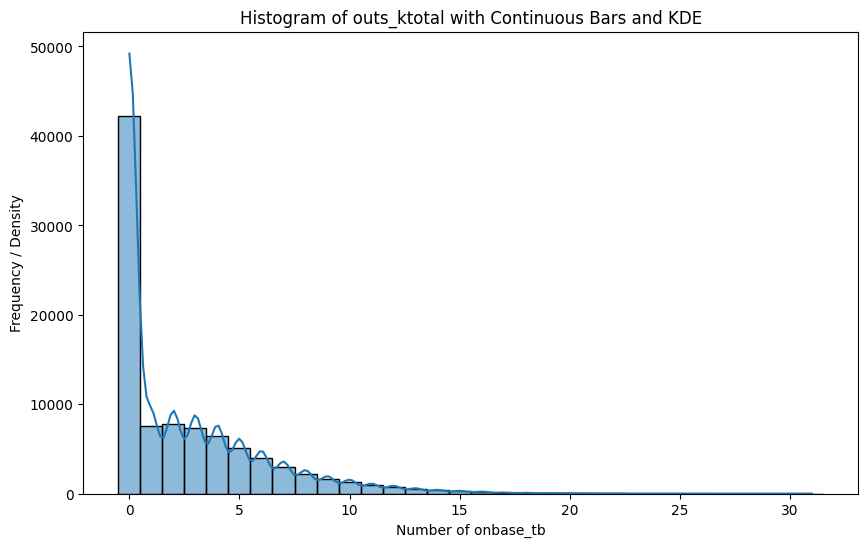

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your final training data is in a DataFrame called final_training_df
target_variable = final_training_df[variable_to_predict]

plt.figure(figsize=(10, 6))
sns.histplot(target_variable, kde=True, discrete=True)
plt.title('Histogram of outs_ktotal with Continuous Bars and KDE')
plt.xlabel('Number of onbase_tb')
plt.ylabel('Frequency / Density')
plt.show()

In [218]:
target_variable.unique()

array([ 0,  5,  7,  4,  3,  2,  1,  6, 13, 10,  9,  8, 11, 15, 17, 12, 14,
       19, 18, 21, 22, 16, 23, 20, 26, 28, 25, 24, 31])

In [219]:
# import numpy as np

# Specify the column for analysis
col = variable_to_predict

# Calculate variance
variance = final_training_df[col].var()
print(f"Variance ({col}): {variance}")

# Calculate standard deviation
std_dev = final_training_df[col].std()
print(f"Standard Deviation ({col}): {std_dev}")

# Calculate range
range_val = final_training_df[col].max() - final_training_df[col].min()
print(f"Range ({col}): {range_val}")

# Calculate interquartile range (IQR)
q1 = final_training_df[col].quantile(0.25)
q3 = final_training_df[col].quantile(0.75)
iqr = q3 - q1
print(f"IQR ({col}): {iqr}")

# Calculate mean absolute deviation (MAD)
mean_val = final_training_df[col].mean()
print(f"Mean ({col}): {mean_val}")  # <--- This line prints the mean
mad = np.mean(np.abs(final_training_df[col] - mean_val))
print(f"Mean Absolute Deviation ({col}): {mad}")

# Calculate coefficient of variation (CV)
cv = (std_dev / mean_val) * 100
print(f"Coefficient of Variation (%) ({col}): {cv}")

# Calculate variance-to-mean ratio (for count data)
if mean_val != 0:
    variance_to_mean = variance / mean_val
    print(f"Variance-to-Mean Ratio ({col}): {variance_to_mean}")
else:
    print(f"Mean is zero for {col}, cannot calculate Variance-to-Mean Ratio.")


Variance (rebounds): 11.362375567888497
Standard Deviation (rebounds): 3.370812300898479
Range (rebounds): 31
IQR (rebounds): 4.0
Mean (rebounds): 2.5031389645776567
Mean Absolute Deviation (rebounds): 2.633392766328356
Coefficient of Variation (%) (rebounds): 134.66341056567032
Variance-to-Mean Ratio (rebounds): 4.539250808157037


In [220]:
X = final_training_df.drop(columns=[variable_to_predict])
y = final_training_df[variable_to_predict]

In [221]:
X.columns

Index(['attendance_x', 'venue_capacity_x', 'points_prev_7_games_career_sum_x',
       'timeouts_remaining_prev_7_games_career_sum',
       'field_goals_made_prev_7_games_career_sum_x',
       'field_goals_att_prev_7_games_career_sum_x',
       'three_points_made_prev_7_games_career_sum_x',
       'three_points_att_prev_7_games_career_sum_x',
       'two_points_made_prev_7_games_career_sum_x',
       'two_points_att_prev_7_games_career_sum_x',
       ...
       'player_pos_f', 'player_pos_f-c', 'player_pos_f-g', 'player_pos_g',
       'player_pos_g-f', 'player_prim_pos_c', 'player_prim_pos_pf',
       'player_prim_pos_pg', 'player_prim_pos_sf', 'player_prim_pos_sg'],
      dtype='object', length=178)

In [222]:
X.shape

(91750, 178)

In [223]:
X.dtypes

attendance_x                                                float64
venue_capacity_x                                              int64
points_prev_7_games_career_sum_x                            float64
timeouts_remaining_prev_7_games_career_sum                  float64
field_goals_made_prev_7_games_career_sum_x                  float64
field_goals_att_prev_7_games_career_sum_x                   float64
three_points_made_prev_7_games_career_sum_x                 float64
three_points_att_prev_7_games_career_sum_x                  float64
two_points_made_prev_7_games_career_sum_x                   float64
two_points_att_prev_7_games_career_sum_x                    float64
blocked_att_prev_7_games_career_sum_x                       float64
free_throws_made_prev_7_games_career_sum_x                  float64
free_throws_att_prev_7_games_career_sum_x                   float64
offensive_rebounds_prev_7_games_career_sum_x                float64
defensive_rebounds_prev_7_games_career_sum_x    

In [224]:
# X.to_csv('../../data/nba/processed_training_data/nba_player_team_stats_2023_24_points_training_data_v001.csv', index= False)

In [225]:
for column in X.columns:
    # Check if the column is of boolean type
    if X[column].dtype == 'bool':
        # Convert the boolean column to integers (1 for True, 0 for False)
        X[column] = X[column].astype(int)

In [226]:
# X['opponent'] = X['opponent'].apply(lambda x:str(x))

In [227]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Example: X (features), y (strikeouts)
# X = sm.add_constant(X)  # statsmodels requires constant
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train,y_train = X,y

In [228]:
print(X_train.dtypes, y_train.dtypes)

attendance_x                                                float64
venue_capacity_x                                              int64
points_prev_7_games_career_sum_x                            float64
timeouts_remaining_prev_7_games_career_sum                  float64
field_goals_made_prev_7_games_career_sum_x                  float64
field_goals_att_prev_7_games_career_sum_x                   float64
three_points_made_prev_7_games_career_sum_x                 float64
three_points_att_prev_7_games_career_sum_x                  float64
two_points_made_prev_7_games_career_sum_x                   float64
two_points_att_prev_7_games_career_sum_x                    float64
blocked_att_prev_7_games_career_sum_x                       float64
free_throws_made_prev_7_games_career_sum_x                  float64
free_throws_att_prev_7_games_career_sum_x                   float64
offensive_rebounds_prev_7_games_career_sum_x                float64
defensive_rebounds_prev_7_games_career_sum_x    

In [229]:
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100,  # Number of trees in the forest
                                 random_state=42,
                                 n_jobs=-1,       # Use all available cores
                                 max_depth=10,    # Maximum depth of the trees (tune this)
                                 min_samples_split=2, # Minimum samples required to split a node (tune this)
                                 min_samples_leaf=1)  # Minimum samples required at a leaf node (tune this)

rf_model.fit(X_train, y_train)



RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [230]:
# with open('../../../models/nfl_qb_passing_touchdowns_2023_24_entire_data_player_opponent_stats_v002.pkl', 'wb') as f:
#     pickle.dump(rf_model, f)

In [231]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

##### function to calculate the prediction and the over and under probability

In [232]:
def predict(model, y_test, threshold):

    strikeout_prediction = model.predict(y_test)
    y_test = y_test.values.reshape(1, -1) \
                              if isinstance(y_test, pd.Series) \
                              else y_test.reshape(1, -1)
    
    preds_array = np.array([tree.predict(y_test)[0] for tree in model.estimators_])

    mean_pred = np.mean(preds_array)
    std_dev_pred = np.std(preds_array)

    # Create the fitted normal distribution
    fitted_normal_dist = norm(loc=mean_pred, scale=std_dev_pred)

    if std_dev_pred == 0:
        prob_over_threshold = 1.0 if strikeout_prediction > threshold else 0.0
        prob_under_threshold = 1.0 - prob_over_threshold
    else:
        # Create the fitted normal distribution
        fitted_normal_dist = norm(loc=mean_pred, scale=std_dev_pred)

        # Calculate probability over the threshold (Survival Function)
        prob_over_threshold = fitted_normal_dist.sf(threshold)

        # Calculate probability under the threshold (Cumulative Distribution Function)
        prob_under_threshold = fitted_normal_dist.cdf(threshold)

    print(f"Overall Prediction: {strikeout_prediction:.4f}")
    print(f"Parametric P(X > {threshold}) (Over Probability): {prob_over_threshold:.4f}")
    print(f"Parametric P(X <= {threshold}) (Under Probability): {prob_under_threshold:.4f}")

    return {
        'overall_prediction': strikeout_prediction,
        'prob_over_threshold': prob_over_threshold,
        'prob_under_threshold': prob_under_threshold
    }
        

##### calculate the over probability using prediction distribution

In [233]:
X_exp = X_test.iloc[0]
y_exp = y_test.iloc[0]

X_exp = X_exp.values.reshape(1, -1) \
                              if isinstance(X_exp, pd.Series) \
                              else X_exp.reshape(1, -1)
X_exp

array([[ 1.89970000e+04,  1.89970000e+04,  1.90000000e+01,
         1.00000000e+01,  8.00000000e+00,  1.10000000e+01,
         0.00000000e+00,  0.00000000e+00,  8.00000000e+00,
         1.10000000e+01,  3.00000000e+00,  3.00000000e+00,
         6.00000000e+00,  4.00000000e+00,  1.10000000e+01,
         1.50000000e+01,  2.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  9.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.40000000e+01,
         9.00000000e+00,  1.00000000e+00,  1.60000000e+01,
         1.10000000e+01,  8.00000000e+00,  3.00000000e+00,
         2.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         2.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.56000000e+02,  1.42000000e+02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  7.00000000e+00,
         5.00000000e+00,  7.00000000e+00,  7.00000000e+00,
         2.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  6.31000000e+01,  0.00000000e+0

In [234]:
trees = rf_model.estimators_
# trees

In [235]:
# all_preds = [tree.predict(X_exp) for tree in trees]
# all_preds
all_predictions = []
for tree in trees:
    predictions = tree.predict(X_exp)
    all_predictions.append(predictions)
all_predictions

[array([1.96674473]),
 array([1.95136418]),
 array([1.84772437]),
 array([1.49852632]),
 array([2.28533475]),
 array([1.25255973]),
 array([2.13965479]),
 array([2.09823911]),
 array([1.90019194]),
 array([1.79342723]),
 array([1.88632987]),
 array([2.12222222]),
 array([2.46823529]),
 array([2.36633296]),
 array([1.96871705]),
 array([2.12293729]),
 array([2.02770781]),
 array([1.92405063]),
 array([2.06755066]),
 array([1.66470588]),
 array([1.6569433]),
 array([2.81714286]),
 array([1.43109739]),
 array([2.65002936]),
 array([1.70890052]),
 array([3.3490566]),
 array([2.69377049]),
 array([2.03250317]),
 array([3.75]),
 array([1.9982699]),
 array([1.95434828]),
 array([2.13805698]),
 array([6.64285714]),
 array([2.34124439]),
 array([1.70362239]),
 array([1.64492155]),
 array([1.25431034]),
 array([2.29044586]),
 array([2.37414966]),
 array([2.20010616]),
 array([2.2069451]),
 array([1.85228898]),
 array([1.76542789]),
 array([2.15125448]),
 array([1.14364641]),
 array([2.12625672])

In [236]:
preds_array = np.array([arr[0] for arr in all_predictions])

preds_array

array([1.96674473, 1.95136418, 1.84772437, 1.49852632, 2.28533475,
       1.25255973, 2.13965479, 2.09823911, 1.90019194, 1.79342723,
       1.88632987, 2.12222222, 2.46823529, 2.36633296, 1.96871705,
       2.12293729, 2.02770781, 1.92405063, 2.06755066, 1.66470588,
       1.6569433 , 2.81714286, 1.43109739, 2.65002936, 1.70890052,
       3.3490566 , 2.69377049, 2.03250317, 3.75      , 1.9982699 ,
       1.95434828, 2.13805698, 6.64285714, 2.34124439, 1.70362239,
       1.64492155, 1.25431034, 2.29044586, 2.37414966, 2.20010616,
       2.2069451 , 1.85228898, 1.76542789, 2.15125448, 1.14364641,
       2.12625672, 2.34573413, 1.67012602, 1.27307692, 1.81716236,
       6.68421053, 1.79920814, 1.92609819, 1.99085815, 1.96377044,
       2.14190933, 2.07521287, 2.03302374, 1.74932821, 4.27586207,
       1.32762313, 2.10595483, 1.98860399, 2.2485302 , 2.47301587,
       2.14939382, 2.44047619, 2.0733945 , 2.09145729, 1.79941003,
       2.17487967, 1.95321637, 1.99703759, 1.40472674, 2.35197

In [237]:
pred_err = preds_array-y_exp
pred_err

array([-3.32552693e-02, -4.86358244e-02, -1.52275627e-01, -5.01473684e-01,
        2.85334750e-01, -7.47440273e-01,  1.39654786e-01,  9.82391103e-02,
       -9.98080614e-02, -2.06572770e-01, -1.13670134e-01,  1.22222222e-01,
        4.68235294e-01,  3.66332963e-01, -3.12829525e-02,  1.22937294e-01,
        2.77078086e-02, -7.59493671e-02,  6.75506630e-02, -3.35294118e-01,
       -3.43056697e-01,  8.17142857e-01, -5.68902610e-01,  6.50029360e-01,
       -2.91099476e-01,  1.34905660e+00,  6.93770492e-01,  3.25031659e-02,
        1.75000000e+00, -1.73010381e-03, -4.56517249e-02,  1.38056976e-01,
        4.64285714e+00,  3.41244387e-01, -2.96377607e-01, -3.55078448e-01,
       -7.45689655e-01,  2.90445860e-01,  3.74149660e-01,  2.00106157e-01,
        2.06945096e-01, -1.47711016e-01, -2.34572110e-01,  1.51254480e-01,
       -8.56353591e-01,  1.26256722e-01,  3.45734127e-01, -3.29873981e-01,
       -7.26923077e-01, -1.82837640e-01,  4.68421053e+00, -2.00791855e-01,
       -7.39018088e-02, -

In [238]:
np.mean(preds_array)

np.float64(2.1649931210881332)

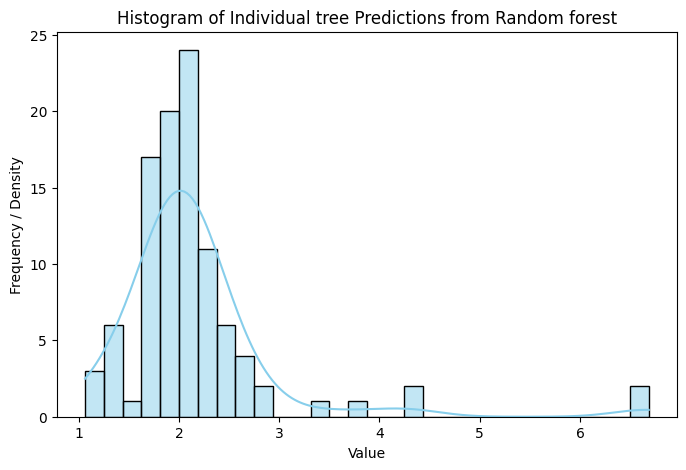

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5)) # Optional: Set figure size for better readability

sns.histplot(data=preds_array, bins=30, kde=True, color='skyblue', edgecolor='black')

# Add labels and title for clarity
plt.xlabel("Value")
plt.ylabel("Frequency / Density") # Y-axis label changes if kde=True
plt.title("Histogram of Individual tree Predictions from Random forest")

# Display the plot
plt.show()

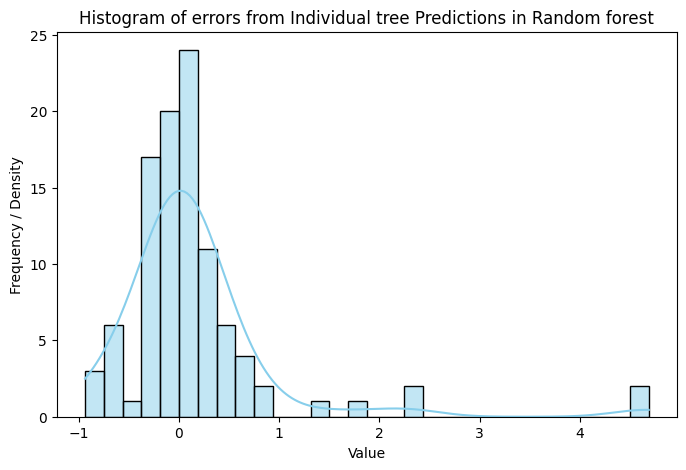

In [240]:
plt.figure(figsize=(8, 5)) # Optional: Set figure size for better readability

sns.histplot(data=pred_err, bins=30, kde=True, color='skyblue', edgecolor='black')

# Add labels and title for clarity
plt.xlabel("Value")
plt.ylabel("Frequency / Density") # Y-axis label changes if kde=True
plt.title("Histogram of errors from Individual tree Predictions in Random forest")

# Display the plot
plt.show()

In [241]:
# with open('../../../models/nba_player_team_2023_24_stats_rebounds_rf_v001.pkl', 'wb') as f:
#     pickle.dump(rf_model, f)

In [242]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [243]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Random Forest Regressor Evaluation:
Mean Squared Error (MSE): 5.59
Mean Absolute Error (MAE): 1.59
R-squared (R2): 0.51


In [244]:
# Note on handling count data with RandomForestRegressor:
# RandomForestRegressor predicts continuous values. For count data, the predictions will be floating-point numbers.
# You might want to round these predictions to the nearest integer for interpretation as counts.
y_pred_rounded = np.round(y_pred).astype(int)

print("\nRounded Predictions (first 20):")
print(y_pred_rounded[:20])
print("\nActual Test Values (first 20):")
print(y_test.head(20).values)

# Evaluate rounded predictions (
mse_rounded = mean_squared_error(y_test, y_pred_rounded)
mae_rounded = mean_absolute_error(y_test, y_pred_rounded)
r2_rounded = r2_score(y_test, y_pred_rounded)

print("\nRandom Forest Regressor Evaluation (Rounded Predictions):")
print(f"Mean Squared Error (MSE): {mse_rounded:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rounded:.2f}")
print(f"R-squared (R2): {r2_rounded:.2f}")


Rounded Predictions (first 20):
[2 8 1 8 0 1 2 0 3 3 3 2 1 2 0 1 0 6 1 0]

Actual Test Values (first 20):
[2 8 0 4 0 1 1 0 1 5 1 5 2 6 0 0 0 2 0 5]

Random Forest Regressor Evaluation (Rounded Predictions):
Mean Squared Error (MSE): 5.66
Mean Absolute Error (MAE): 1.54
R-squared (R2): 0.50


In [245]:
# Define the bins (bucket boundaries)
bins = [-1, 0, 1, 2, 3, 4, 5, float('inf')] # -1 to capture exactly 0, float('inf') for the open-ended last bucket

# Define the labels for each bucket
labels = ['<0', '0', '1', '2', '3', '4', '5+']

# Use pd.cut to categorize the data into buckets
y_test_buckets = pd.cut(y_train, bins=bins, labels=labels, right=False)
# 'right=False' means the bins include the left boundary but exclude the right boundary,
# e.g., [0, 5) means 0 up to (but not including) 5.

# Get the count of values in each bucket
distribution = y_test_buckets.value_counts().sort_index()
print(distribution)

rebounds
<0        0
0     33683
1      6016
2      6238
3      5892
4      5174
5+    16397
Name: count, dtype: int64


In [246]:
# # Assuming X_test contains the features for prediction
# y_pred = rf_model.predict(X_test)

# # Assuming y_test is a DataFrame or you want to create one for results
# # If y_test is a Series, convert it to a DataFrame first if you want to add a new column
# if isinstance(y_test, pd.Series):
#     y_test_df = y_test.to_frame(name='actual_values') # Name the column appropriately
# else:
#     y_test_df = y_test

# y_test_df['preds'] = y_pred
# y_test_df.to_csv('../../../data/spain_soccer_shots_on_target_y_test.csv', index=False)

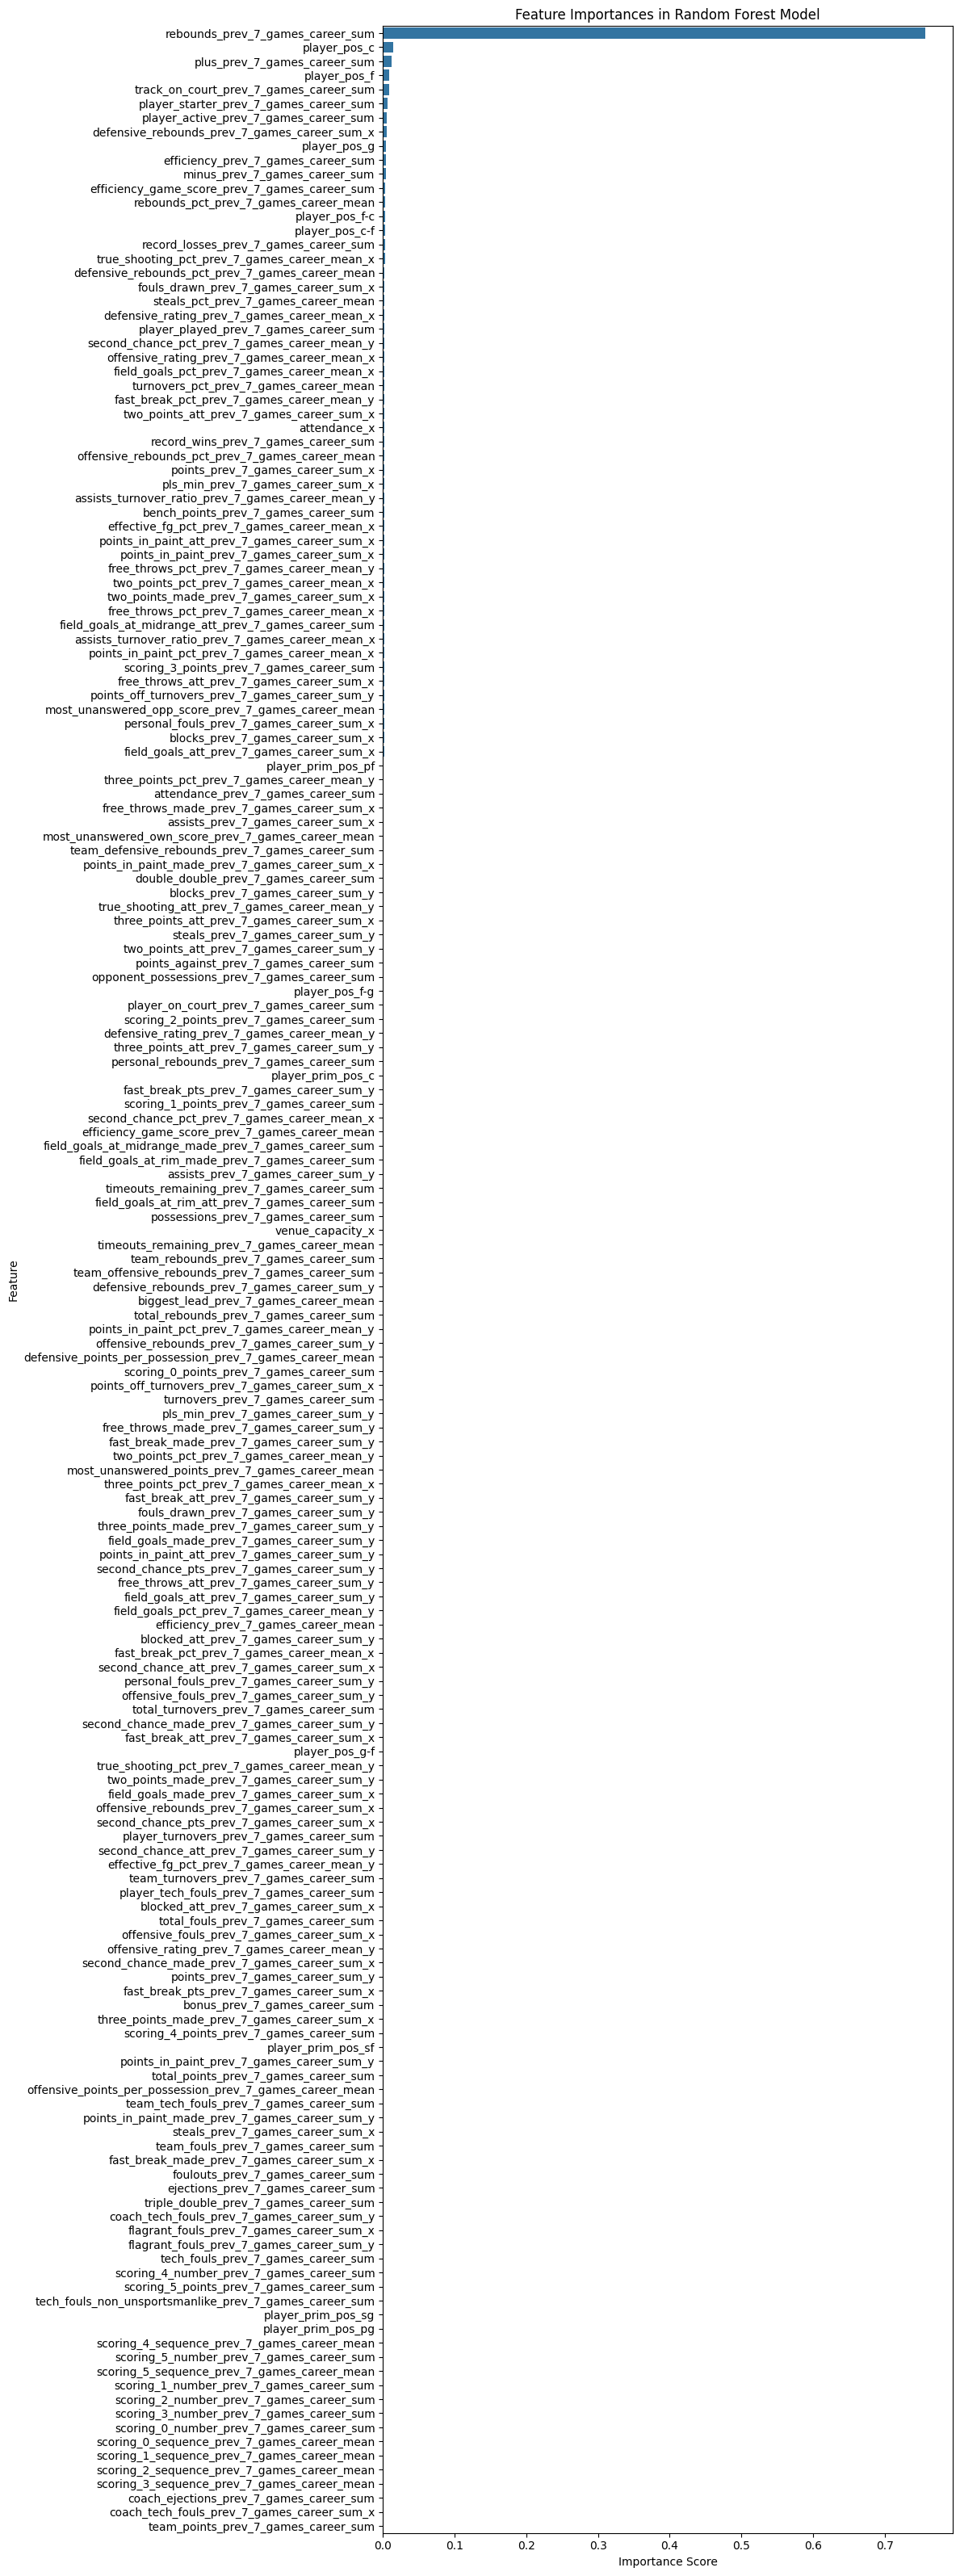


Feature Importance:
rebounds_prev_7_games_career_sum: 0.7570
player_pos_c: 0.0138
plus_prev_7_games_career_sum: 0.0117
player_pos_f: 0.0084
track_on_court_prev_7_games_career_sum: 0.0083
player_starter_prev_7_games_career_sum: 0.0063
player_active_prev_7_games_career_sum: 0.0058
defensive_rebounds_prev_7_games_career_sum_x: 0.0050
player_pos_g: 0.0043
efficiency_prev_7_games_career_sum: 0.0040
minus_prev_7_games_career_sum: 0.0038
efficiency_game_score_prev_7_games_career_sum: 0.0034
rebounds_pct_prev_7_games_career_mean: 0.0033
player_pos_f-c: 0.0031
player_pos_c-f: 0.0030
record_losses_prev_7_games_career_sum: 0.0026
true_shooting_pct_prev_7_games_career_mean_x: 0.0026
defensive_rebounds_pct_prev_7_games_career_mean: 0.0025
fouls_drawn_prev_7_games_career_sum_x: 0.0024
steals_pct_prev_7_games_career_mean: 0.0023
defensive_rating_prev_7_games_career_mean_x: 0.0021
player_played_prev_7_games_career_sum: 0.0021
second_chance_pct_prev_7_games_career_mean_y: 0.0020
offensive_rating_prev_

In [247]:
# Feature Importance
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns
sorted_importance = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)
sorted_feature_names = [item[0] for item in sorted_importance]
sorted_importances = [item[1] for item in sorted_importance]

# Create the bar plot
plt.figure(figsize=(12, 32))
sns.barplot(x=sorted_importances, y=sorted_feature_names)
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nFeature Importance:")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance:.4f}")

In [248]:
# with open('../../../models/nfl_qb_passing_touchdowns_2023_24_player_opponent_stats_v001.pkl', 'wb') as f:
#     pickle.dump(rf_model, f)

In [249]:
# y_df = y_test.copy()

# y_df = pd.DataFrame(y_df)
# # y_df['y_pred_brf'] = y_pred_brf
# y_df['y_pred_rf'] = y_pred
# # y_df = pd.concat([y_test, pd.Series(y_pred_brf), pd.Series(y_pred_rf)], axis = 1)

# y_df.to_csv(r'../../../../data/nfl_rushing_touchdowns_multimodel_output_only_rf.csv', index = False)

In [250]:
# y_df.head()

In [251]:
to stop the execution of the script here

SyntaxError: invalid syntax (3122771044.py, line 1)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

n_splits = 5 # For example, 5-fold cross-validation

print(f"Performing {n_splits}-fold cross-validation...")

# --- Evaluate using Mean Squared Error (MSE) ---
# cross_val_score by default tries to maximize the score, so for MSE (which is a loss),
# we need to specify 'neg_mean_squared_error' and then negate the result.
mse_scores = -cross_val_score(rf_model, X_train, y_train, cv=n_splits, scoring='neg_mean_squared_error', n_jobs=-1)
print(f"Cross-validated MSE scores for each fold: {mse_scores}")
print(f"Mean Cross-validated MSE: {np.mean(mse_scores):.4f}")
print(f"Standard Deviation of Cross-validated MSE: {np.std(mse_scores):.4f}")

print("\n" + "="*50 + "\n")

# --- Evaluate using Mean Absolute Error (MAE) ---
mae_scores = -cross_val_score(rf_model, X_train, y_train, cv=n_splits, scoring='neg_mean_absolute_error', n_jobs=-1)
print(f"Cross-validated MAE scores for each fold: {mae_scores}")
print(f"Mean Cross-validated MAE: {np.mean(mae_scores):.4f}")
print(f"Standard Deviation of Cross-validated MAE: {np.std(mae_scores):.4f}")

print("\n" + "="*50 + "\n")

# --- Evaluate using R-squared (R2) ---
r2_scores = cross_val_score(rf_model, X_train, y_train, cv=n_splits, scoring='r2', n_jobs=-1)
print(f"Cross-validated R2 scores for each fold: {r2_scores}")
print(f"Mean Cross-validated R2: {np.mean(r2_scores):.4f}")
print(f"Standard Deviation of Cross-validated R2: {np.std(r2_scores):.4f}")

print("\nCross-validation complete.")


Performing 5-fold cross-validation...
Cross-validated MSE scores for each fold: [0.29452836 0.3212076  0.28044357 0.25408512 0.33043693]
Mean Cross-validated MSE: 0.2961
Standard Deviation of Cross-validated MSE: 0.0276


Cross-validated MAE scores for each fold: [0.37586404 0.3915675  0.37631365 0.36469601 0.40328593]
Mean Cross-validated MAE: 0.3823
Standard Deviation of Cross-validated MAE: 0.0135


Cross-validated R2 scores for each fold: [ 0.08141929  0.05634842 -0.01377302  0.08805435  0.0005557 ]
Mean Cross-validated R2: 0.0425
Standard Deviation of Cross-validated R2: 0.0417

Cross-validation complete.


In [ ]:
from sklearn.model_selection import GridSearchCV

# --- Hyperparameter Tuning with GridSearchCV ---
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200], # Number of trees
    'max_depth': [None, 10, 20],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]    # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
# We use 'neg_mean_squared_error' as the scoring metric for tuning
# cv=n_splits ensures that tuning is also done with cross-validation
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=n_splits,
                           scoring='neg_mean_squared_error', # Use a single metric for tuning
                           n_jobs=-1,
                           verbose=2) # Set verbose to 2 to see progress

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

print("\nHyperparameter tuning complete.")

# Print the best parameters and best score found
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validated MSE (negative, so smaller absolute value is better): {-grid_search.best_score_:.4f}")

# Get the best model
best_rf_model = grid_search.best_estimator_
print("\nBest Random Forest Regressor model (after tuning):")
print(best_rf_model)

# You can now use best_rf_model for final predictions on X_test
# For example:
y_pred_tuned = best_rf_model.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print(f"\nMSE on test set with tuned model: {mse_tuned:.4f}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits

Hyperparameter tuning complete.
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validated MSE (negative, so smaller absolute value is better): 0.2911

Best Random Forest Regressor model (after tuning):
RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200, n_jobs=-1, random_state=42)

MSE on test set with tuned model: 0.2927


In [ ]:
rf_model_hp_tuned = RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200, n_jobs=-1, random_state=42)

rf_model_hp_tuned.fit(X_train, y_train)

y_preds_hp = rf_model_hp_tuned.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_preds_hp)
mae = mean_absolute_error(y_test, y_preds_hp)
r2 = r2_score(y_test, y_preds_hp)

print("Random Forest Regressor Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Random Forest Regressor Evaluation:
Mean Squared Error (MSE): 0.29
Mean Absolute Error (MAE): 0.40
R-squared (R2): 0.08


In [ ]:
# with open('../../../models/spain_soccer_strikeouts_rf_hp_tuned_2024_v001.pkl', 'wb') as f:
#     pickle.dump(rf_model, f)
# with open('../../../../models/nfl_qb_passing_yards_v002.pkl', 'wb') as f:
#     pickle.dump(rf_model_hp_tuned, f)

In [ ]:
print("Fitting Zero-Inflated Poisson (ZIP) Model...")
try:
    zip_model = sm.ZeroInflatedPoisson(
        endog=y_train,        # Dependent variable (counts)
        exog=X_train,         # Independent variables for the count part (Poisson) - now includes constant
        exog_infl=X_train     # Independent variables for the zero-inflation part (logistic) - now includes constant
    )

    # Fit the model
    zip_results = zip_model.fit()

    print("\nZIP Model Summary:")
    print(zip_results.summary())
    print("-" * 50)

    # --- 3. Make Predictions ---
    # Predictions from ZeroInflatedPoisson are expected values (can be float)
    y_pred_zip_continuous = zip_results.predict(exog=X_test, exog_infl=X_test) # Updated: Use X_test directly

    # Since the target is counts, post-process by rounding and ensuring non-negativity
    y_pred_zip_final = np.round(y_pred_zip_continuous)
    y_pred_zip_final = np.maximum(0, y_pred_zip_final) # Ensure no negative counts

    print("\nPredictions made and post-processed.")
    print(f"Sample of continuous predictions: {y_pred_zip_continuous[:5]}")
    print(f"Sample of final (rounded & clipped) predictions: {y_pred_zip_final[:5]}")
    print("-" * 50)

    # --- 4. Evaluate the Model ---
    print("Evaluating ZIP Model performance:")
    mse = mean_squared_error(y_test, y_pred_zip_final)
    mae = mean_absolute_error(y_test, y_pred_zip_final)
    r2 = r2_score(y_test, y_pred_zip_final)

    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R2): {r2:.4f}")
    print("-" * 50)

except Exception as e:
    print(f"An error occurred during model fitting or prediction: {e}")
    print("Please ensure your 'endog' (y) values are non-negative and your 'exog' (X) values are appropriate.")
    print("Also, ensure 'statsmodels' is installed (`pip install statsmodels`).")

Fitting Zero-Inflated Poisson (ZIP) Model...


C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\discrete_model.py:1331: RuntimeWarning: overflow encountered in exp
  return -np.exp(XB) +  endog*XB - gammaln(endog+1)
C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Pytho

         Current function value: 4251.490799
         Iterations: 5
         Function evaluations: 48
         Gradient evaluations: 27


C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\count_model.py:629: RuntimeWarning: overflow encountered in exp
  coeff = (1 + w[zero_idx] * (np.exp(mu[zero_idx]) - 1))
C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\count_model.py:637: RuntimeWarning: overflow encountered in exp
  w[zero_idx] * mu[zero_idx] * np.exp(mu[zero_idx]) /
C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\count_model.py:637: RuntimeWarning: invalid value encountered in divide
  w[zero_idx] * mu[zero_idx] * np.exp(mu[zero_idx]) /
C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\si


ZIP Model Summary:
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:             runs_earned   No. Observations:                15773
Model:             ZeroInflatedPoisson   Df Residuals:                    15593
Method:                            MLE   Df Model:                          179
Date:                 Tue, 27 May 2025   Pseudo R-squ.:                  -3171.
Time:                         10:51:40   Log-Likelihood:            -6.7059e+07
converged:                       False   LL-Null:                       -21141.
Covariance Type:             nonrobust   LLR p-value:                     1.000
                                                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
inflate_venue_capacity                                                

C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
